In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import seaborn as sns


# MICRODADOS ENEM 2021

In [4]:
df= pd.read_csv('MICRODADOS_ENEM_2021.csv', encoding='latin1', sep=';', dtype = {'NU_ANO': 'int8', 'TP_FAIXA_ETARIA': 'int8', 'TP_NACIONALIDADE': 'int8', 'TP_COR_RACA': 'int8', 'TP_NACIONALIDADE': 'int8',
'TP_ST_CONCLUSAO': 'int8', 'TP_ANO_CONCLUIU': 'int8', 'TP_ESCOLA': 'int8', 'IN_TREINEIRO': 'int8', 'CO_MUNICIPIO_PROVA': 'int8', 'CO_UF_PROVA': 'int8', 'TP_PRESENCA_CN': 'int8', 'TP_PRESENCA_CH': 'int8',  
'TP_PRESENCA_LC':'int8', 'TP_PRESENCA_MT': 'int8', 'TP_SEXO': 'category', 'TX_RESPOSTAS_CN': 'category', 'Q001': 'category', 'Q002': 'category', 'Q003': 'category', 'Q004': 'category', 'Q006': 'category',
'Q007': 'category','Q008': 'category','Q009': 'category','Q010': 'category','Q011': 'category','Q012': 'category','Q013': 'category','Q014': 'category','Q015': 'category','Q016': 'category',
'Q017': 'category','Q018': 'category','Q019': 'category','Q020': 'category','Q021': 'category','Q022': 'category','Q023': 'category','Q024': 'category','Q025': 'category'})
df.head()


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,-27,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,-27,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,-27,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,-27,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,-27,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [3]:
df.shape

(2685053, 76)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685053 entries, 0 to 2685052
Data columns (total 76 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   NU_INSCRICAO            int64   
 1   NU_ANO                  int8    
 2   TP_FAIXA_ETARIA         int8    
 3   TP_SEXO                 category
 4   TP_ESTADO_CIVIL         int64   
 5   TP_COR_RACA             int8    
 6   TP_NACIONALIDADE        int8    
 7   TP_ST_CONCLUSAO         int8    
 8   TP_ANO_CONCLUIU         int8    
 9   TP_ESCOLA               int8    
 10  TP_ENSINO               float64 
 11  IN_TREINEIRO            int8    
 12  CO_MUNICIPIO_ESC        float64 
 13  NO_MUNICIPIO_ESC        object  
 14  CO_UF_ESC               float64 
 15  SG_UF_ESC               object  
 16  TP_DEPENDENCIA_ADM_ESC  float64 
 17  TP_LOCALIZACAO_ESC      float64 
 18  TP_SIT_FUNC_ESC         float64 
 19  CO_MUNICIPIO_PROVA      int8    
 20  NO_MUNICIPIO_PROVA      object  
 21  CO_UF_PR

In [5]:
df.isnull().sum()

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               1
Q022               1
Q023               1
Q024               1
Q025               1
Length: 76, dtype: int64

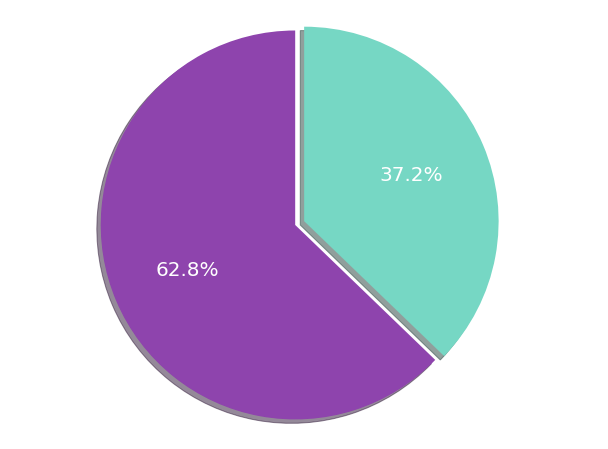

In [6]:
labels = 'Feminino', 'Masculino'
colors = ['#8E44AD', '#76D7C4']
sizes = [df.TP_SEXO[df['TP_SEXO']=='F'].count(), df.TP_SEXO[df['TP_SEXO']=='M'].count()]
explode = (0, 0.05)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors, textprops={'fontsize': 20,  'family': 'sans-serif', 'color':'white'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

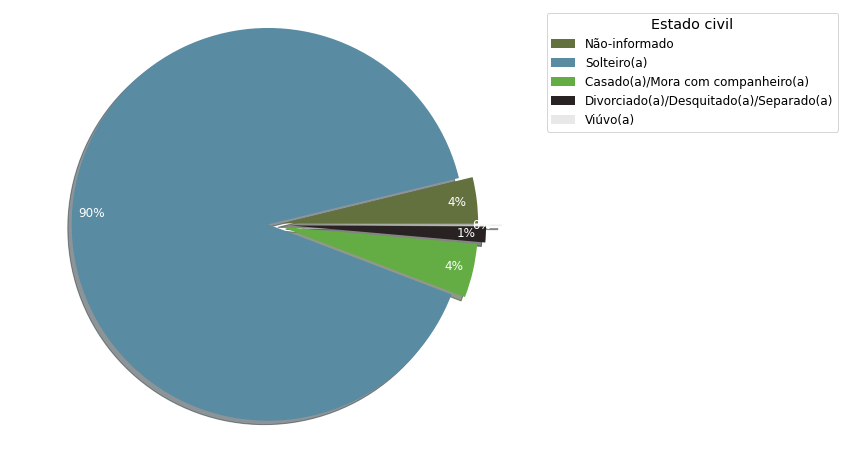

In [7]:
labels = 'Não-informado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'
colors = ['#62713E', '#598ba2', '#63ad44', '#292223', '#E9E8E9']
sizes = [df.TP_ESTADO_CIVIL[df['TP_ESTADO_CIVIL']==0].count(), df.TP_ESTADO_CIVIL[df['TP_ESTADO_CIVIL']==1].count(), df.TP_ESTADO_CIVIL[df['TP_ESTADO_CIVIL']==2].count(),
df.TP_ESTADO_CIVIL[df['TP_ESTADO_CIVIL']==3].count(), df.TP_ESTADO_CIVIL[df['TP_ESTADO_CIVIL']==4].count()]
explode = (0.05, 0.02, 0.05, 0.09, 0.17)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, autopct='%.0f%%', pctdistance=0.9, explode=explode,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 12,  'family': 'sans-serif', 'color':'white'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Estado civil", title_fontsize = 'x-large', 
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

In [8]:
df.loc[(df['TP_ESTADO_CIVIL']==4)]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1242,210051344264,-27,14,F,4,1,1,1,15,1,...,A,A,A,B,A,A,C,A,A,B
3174,210052326980,-27,14,F,4,3,1,2,0,2,...,B,A,A,B,A,B,B,A,A,B
5832,210054032958,-27,15,F,4,3,1,1,15,1,...,A,A,A,B,A,A,C,A,B,B
6718,210051268108,-27,12,M,4,3,1,1,1,1,...,A,A,A,B,A,A,C,A,A,B
6889,210051079637,-27,12,F,4,3,1,1,15,1,...,A,A,B,B,A,A,E,A,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682483,210052916755,-27,15,F,4,3,2,1,15,1,...,A,A,A,B,A,B,D,A,B,B
2682640,210053216012,-27,17,F,4,3,1,1,0,1,...,B,A,A,B,A,A,C,A,A,B
2682894,210054041040,-27,12,F,4,1,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
2683514,210053478020,-27,16,M,4,1,1,1,0,1,...,A,A,A,B,A,A,C,A,C,B


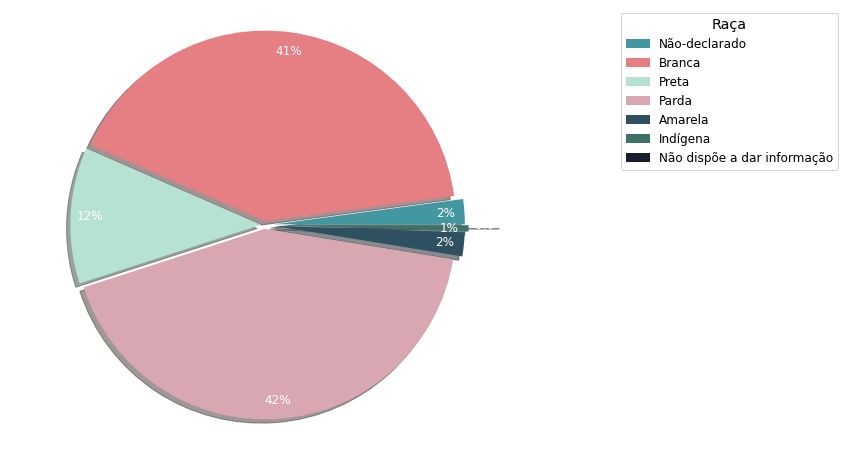

In [19]:
labels = 'Não-declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe a dar informação'
colors = ['#4297A0', '#E57F84', '#B6E2D3', '#D8A7B1', '#2F5061', '#3e7167', '#181c2d']
sizes = [df.TP_COR_RACA[df['TP_COR_RACA']==0].count(), df.TP_COR_RACA[df['TP_COR_RACA']==1].count(), df.TP_COR_RACA[df['TP_COR_RACA']==2].count(),
df.TP_COR_RACA[df['TP_COR_RACA']==3].count(), df.TP_COR_RACA[df['TP_COR_RACA']==4].count(), df.TP_COR_RACA[df['TP_COR_RACA']==5].count(), df.TP_COR_RACA[df['TP_COR_RACA']==6].count()]
explode = (0.05, 0.02, 0.02, 0.02, 0.05, 0.07, 0.25)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode = explode, autopct='%.0f%%', pctdistance=0.9,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 12,  'family': 'sans-serif', 'color':'white'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Raça", title_fontsize = 'x-large', 
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

In [10]:
df.loc[(df['TP_COR_RACA']==6)]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
456293,210051983991,-27,12,M,1,6,1,1,0,1,...,A,A,A,B,A,A,B,A,A,A
1367374,210051118185,-27,14,F,3,6,1,1,0,1,...,A,A,A,B,A,A,D,A,A,B
1645311,210051135416,-27,12,M,2,6,1,1,15,1,...,B,A,B,B,A,A,C,A,B,B
1873845,210054081568,-27,14,M,2,6,1,1,0,1,...,B,A,A,B,A,A,D,A,B,B
1903839,210053842982,-27,12,F,1,6,1,1,13,1,...,B,A,A,B,A,A,D,A,A,B


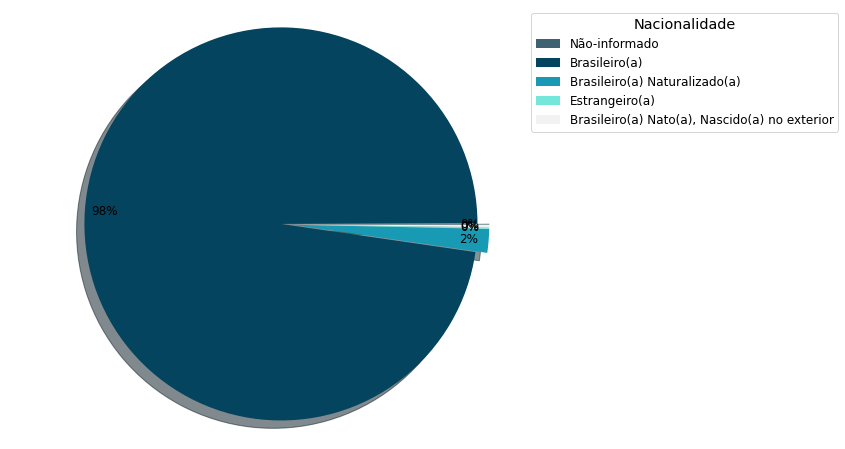

In [17]:
labels = 'Não-informado', 'Brasileiro(a)', 'Brasileiro(a) Naturalizado(a)', 'Estrangeiro(a)', 'Brasileiro(a) Nato(a), Nascido(a) no exterior'
colors = ['#3e6271','#05445E','#189AB4', '#75E6DA', '#F2F2F2']
sizes = [df.TP_NACIONALIDADE[df['TP_NACIONALIDADE']==0].count(), df.TP_NACIONALIDADE[df['TP_NACIONALIDADE']==1].count(), df.TP_NACIONALIDADE[df['TP_NACIONALIDADE']==2].count(),
df.TP_NACIONALIDADE[df['TP_NACIONALIDADE']==3].count(), df.TP_NACIONALIDADE[df['TP_NACIONALIDADE']==4].count()]
explode = (0, 0.03, 0, 0, 0)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, autopct='%.0f%%', pctdistance=0.9, explode=explode, radius=0.5,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 12,  'family': 'sans-serif', 'color':'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Nacionalidade", title_fontsize = 'x-large', 
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

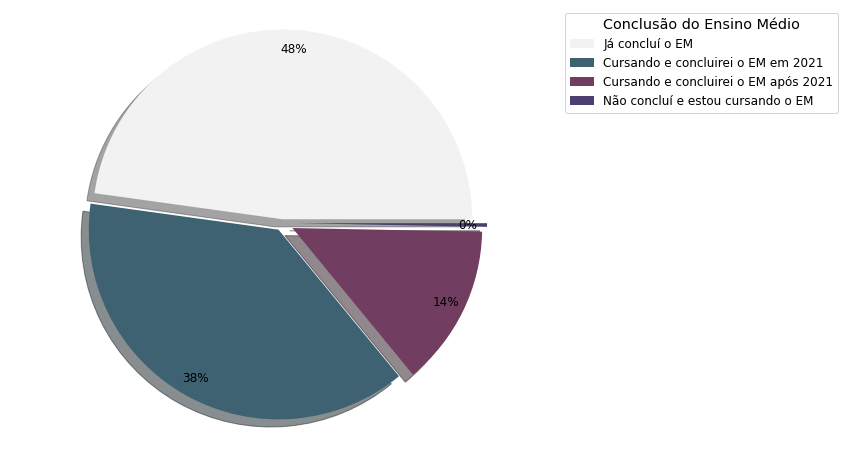

In [12]:
labels = 'Já concluí o EM', 'Cursando e concluirei o EM em 2021', 'Cursando e concluirei o EM após 2021', 'Não concluí e estou cursando o EM'
colors = ['#F2F2F2', '#3e6271', '#713e62', '#4D3E71']
sizes = [df.TP_ST_CONCLUSAO[df['TP_ST_CONCLUSAO']==1].count(), df.TP_ST_CONCLUSAO[df['TP_ST_CONCLUSAO']==2].count(), df.TP_ST_CONCLUSAO[df['TP_ST_CONCLUSAO']==3].count(),
df.TP_ST_CONCLUSAO[df['TP_ST_CONCLUSAO']==4].count()]
explode = (0.01, 0.02, 0.03, 0.04)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, autopct='%.0f%%', pctdistance=0.9, explode=explode, radius=0.5,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 12,  'family': 'sans-serif', 'color':'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Conclusão do Ensino Médio", title_fontsize = 'x-large', 
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

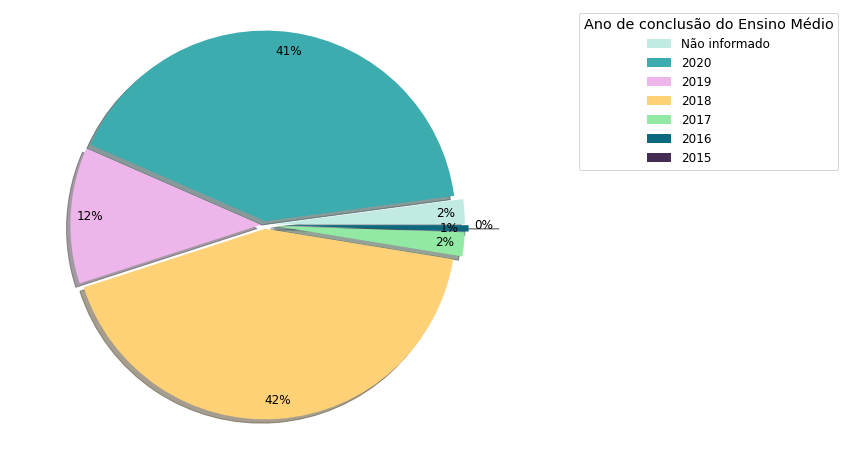

In [25]:
labels = 'Não informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', 'Antes de 2007'
colors = ['#c1eae3', '#3CACAE', '#EEB5EB', '#fed176', '#91e9a3', '#0C6980', '#452c52', '#C15E94', '#F48E79', '#538e42', '#ede00d', '#F7B5CC', 
'#240faa', '#2f2d25', '#5988f7', '#e66865']
sizes = [df.TP_COR_RACA[df['TP_COR_RACA']==0].count(), df.TP_COR_RACA[df['TP_COR_RACA']==1].count(), df.TP_COR_RACA[df['TP_COR_RACA']==2].count(),
df.TP_COR_RACA[df['TP_COR_RACA']==3].count(), df.TP_COR_RACA[df['TP_COR_RACA']==4].count(), df.TP_COR_RACA[df['TP_COR_RACA']==5].count(), df.TP_COR_RACA[df['TP_COR_RACA']==6].count()]
explode = (0.05, 0.02, 0.02, 0.02, 0.05, 0.07, 0.25)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode = explode, autopct='%.0f%%', pctdistance=0.9,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 12,  'family': 'sans-serif', 'color':'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Ano de conclusão do Ensino Médio", title_fontsize = 'x-large', 
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

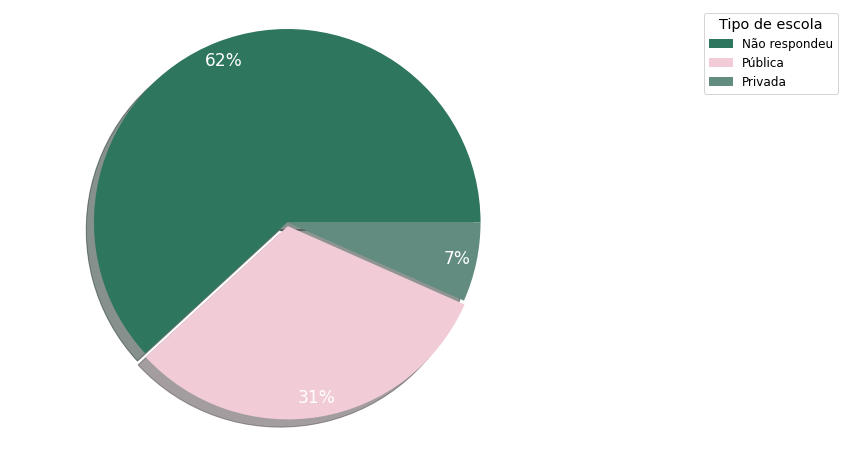

In [28]:
labels = 'Não respondeu', 'Pública', 'Privada'
colors = ['#2E765E', '#F1CCD7', '#638C80']
sizes = [df.TP_ESCOLA[df['TP_ESCOLA']==1].count(), df.TP_ESCOLA[df['TP_ESCOLA']==2].count(), df.TP_ESCOLA[df['TP_ESCOLA']==3].count()]
explode = (0, 0.01, 0)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, autopct='%.0f%%', pctdistance=0.9, explode=explode, radius=0.5,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 17,  'family': 'sans-serif', 'color':'white'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Tipo de escola", title_fontsize = 'x-large', 
          loc="upper right",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

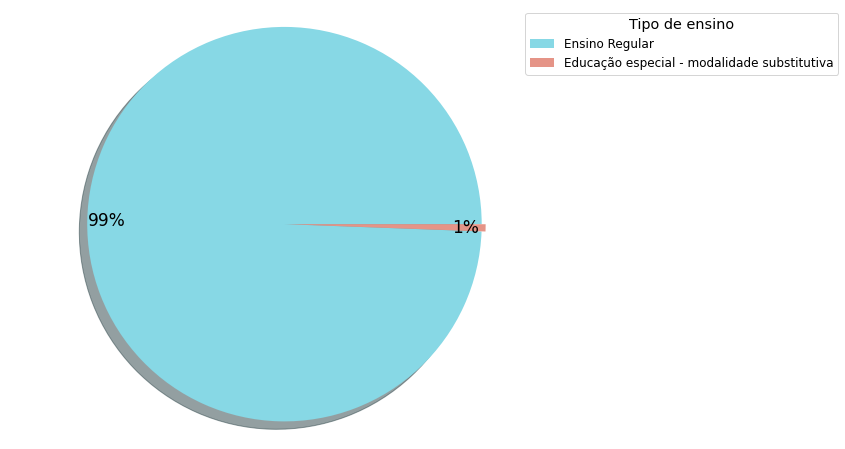

In [16]:
labels = 'Ensino Regular', 'Educação especial - modalidade substitutiva'
colors = ['#87d8e5', '#e59487']
sizes = [df.TP_ENSINO[df['TP_ENSINO']==1].count(), df.TP_ENSINO[df['TP_ENSINO']==2].count()]
explode = (0, 0.01)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, autopct='%.0f%%', pctdistance=0.9, explode=explode, radius=0.5,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 17,  'family': 'sans-serif', 'color':'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Tipo de ensino", title_fontsize = 'x-large', 
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

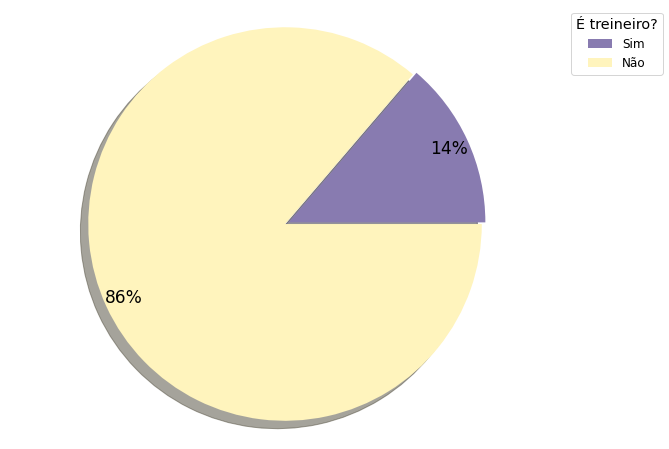

In [30]:
labels = 'Sim', 'Não'
colors = ['#887BB0', '#FFF4BD']
sizes = [df.IN_TREINEIRO[df['IN_TREINEIRO']==1].count(), df.IN_TREINEIRO[df['IN_TREINEIRO']==0].count()]
explode = (0, 0.01)  
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, autopct='%.0f%%', pctdistance=0.9, explode=explode, radius=0.5,
        shadow=True, startangle=0, colors=colors, textprops={'fontsize': 17,  'family': 'sans-serif', 'color':'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="É treineiro?", title_fontsize = 'x-large', 
          loc='upper left',
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'large')
plt.show()

## Análise das notas nas diferentes áreas de conhecimento
CH : Ciências Humanas
CN : Ciências da Natureza
LC : Linguagens e Códigos
MT: Matemática

### 1. Distribuição das notas nas provas

In [5]:
notas = [coluna for coluna in df if 'NU_NOTA' in coluna] #pegando todas as colunas de notas
notas_selecionadas = [coluna for coluna in notas if 'COMP' not in coluna] #excluindo as colunas com as notas de competências em redação
notas_selecionadas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

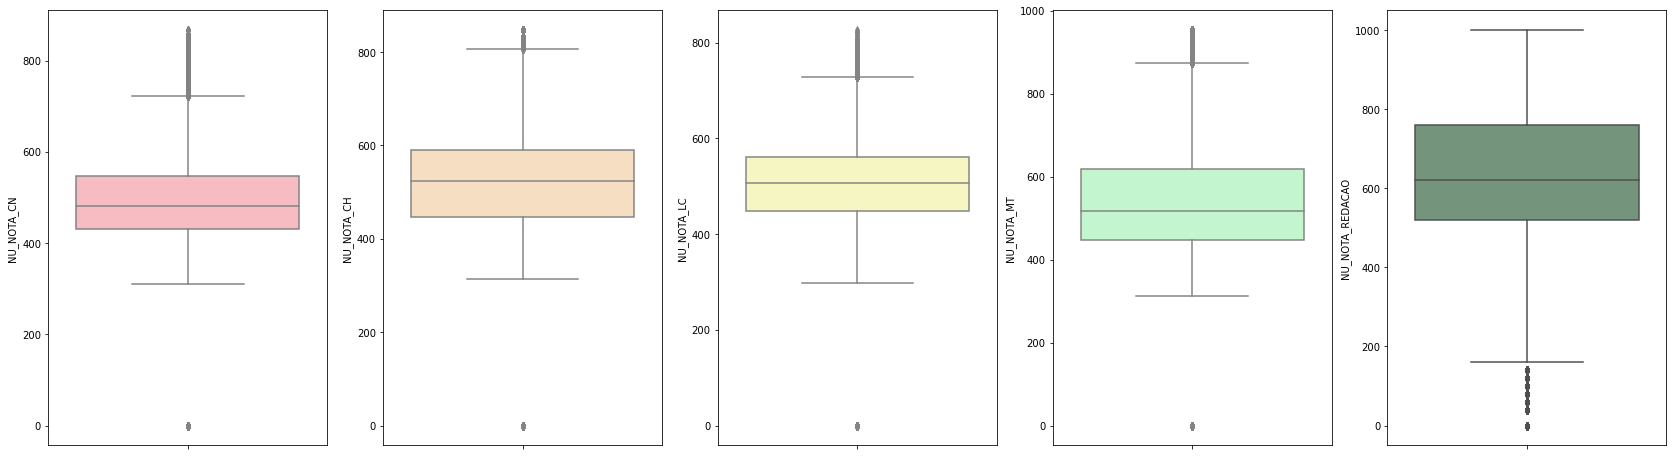

In [19]:
fig, axarr = plt.subplots(1, 5, figsize=(29, 8))

cor = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#6F9978']
for i in range(5):
    coluna = notas_selecionadas[i]
    sns.boxplot(data = df, y=coluna, ax=axarr[i], color=cor[i])

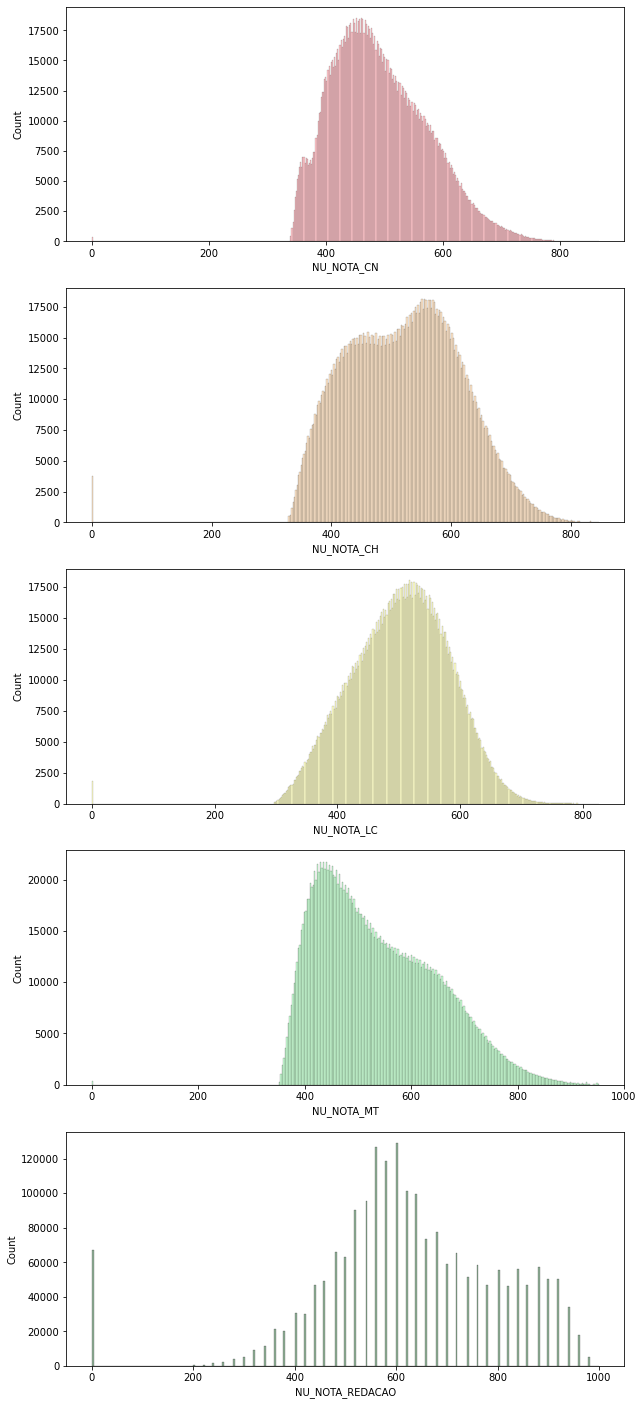

In [20]:
fig, axarr = plt.subplots(5, 1, figsize=(10,25))

cor = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#6F9978']
for i in range(5):
    coluna = notas_selecionadas[i]
    sns.histplot(data = df[coluna], ax=axarr[i], color=cor[i])

A nota da Redação é composta da média das notas em quatro competências, que são: 
- Competência 1 : demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
- Competência 2: compreender a proposta da redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
- Competência 3: selecionar, relacionar, organizar a interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
- Competência 4: demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
- Competência 5: elaborar a proposta de intervenção para o problema abordado, respeitando os direitos humanos.


In [4]:
notas_competencias =[col for col in df if 'NU_NOTA_COMP' in col]
notas_competencias

['NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

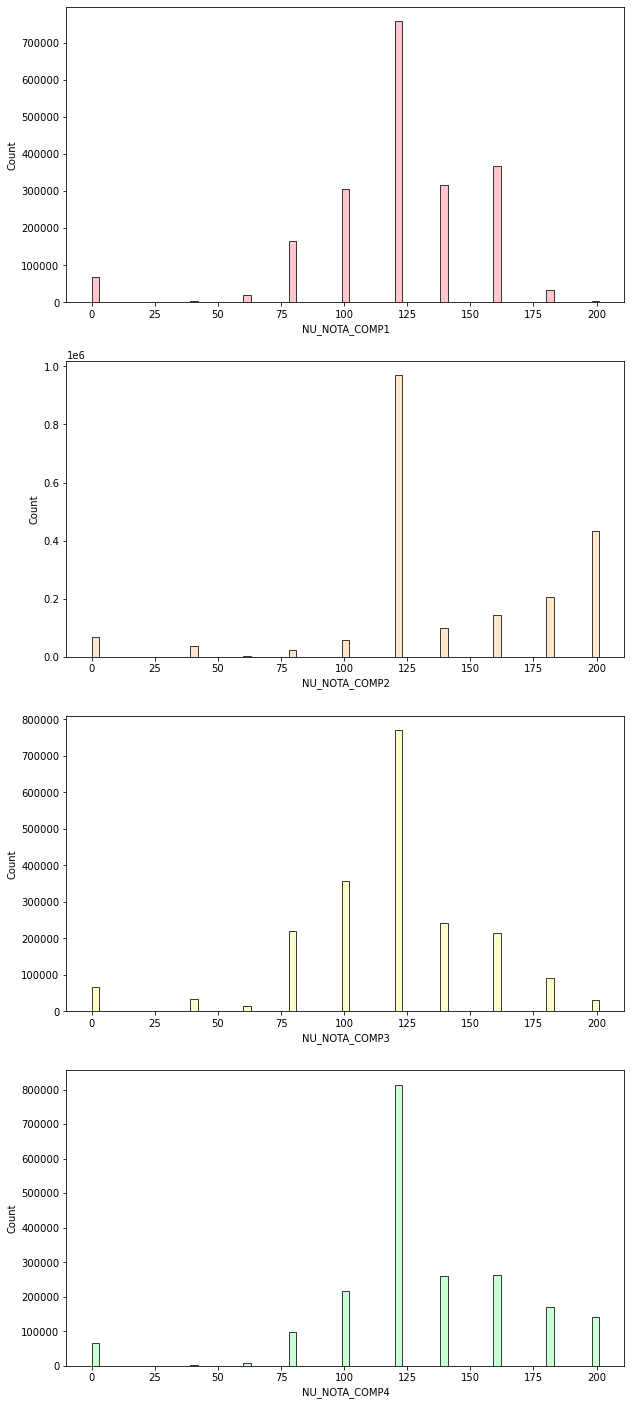

In [22]:
fig, axarr = plt.subplots(4, 1, figsize=(10,25))
cor= ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9']
#cor = ['#374c3c', '	#3c374c', '#4c3c37', '#8D8381']
for i in range(4):
    coluna = notas_competencias[i]
    sns.histplot(data = df[coluna], ax=axarr[i], color=cor[i], binwidth=3)

As notas de redação são valores discretizados devido ao fato de que ela é a média das notas das competências, que também são valores discretizados múltiplos de 40 indo de 0 a 200.
Pode-se notar também a tendência das curvas de Ciências da Natureza e Matemática à esquerda (notas mais baixas), enquanto que as curvas de Ciências Humanas e Linguagens e Códigos tendem a notas mais altas, evidenciando a baixa qualidade do ensino das ciências exatas e biológicas no país.

### 2. Distribuição das notas levando-se em consideração critérios socioeconômicos

In [35]:
#criando uma função para gerar os boxplot das notas como função de parâmetros tais como sexo, etc.
def graficos(a, b, var, palette_color, x_label):
    fig, ax = plt.subplots(5, 1, figsize=(a, b))

    for i in range(5):
        coluna = notas_selecionadas[i]
        sns.boxplot(data = df, x = var, y=coluna, ax=ax[i], palette= palette_color).set_xlabel(x_label)

a) Nota e gênero:

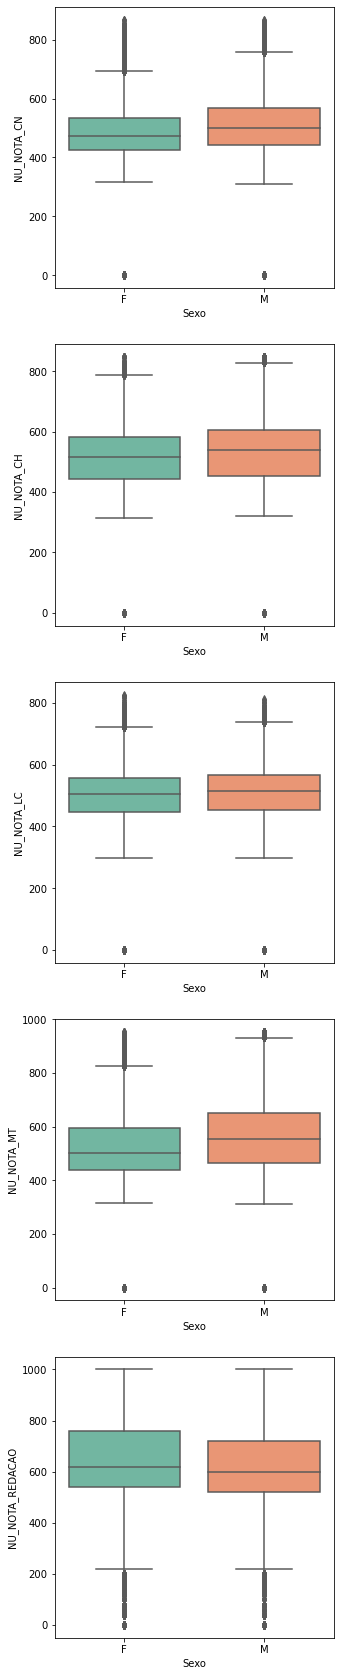

In [36]:
graficos(5, 30, 'TP_SEXO', "Set2", 'Sexo')

O desempenho dos homens é ligeiramente melhor que o das mulheres, exceto em Redação. No entanto, nota-se também que há mais outliers em notas altas no desempenho das mulheres. 

b) Nota e tipo de escola onde fez o Ensino Médio, onde:
- 1 - Não respondeu.
- 2 - Pública.
- 3 - Privada.

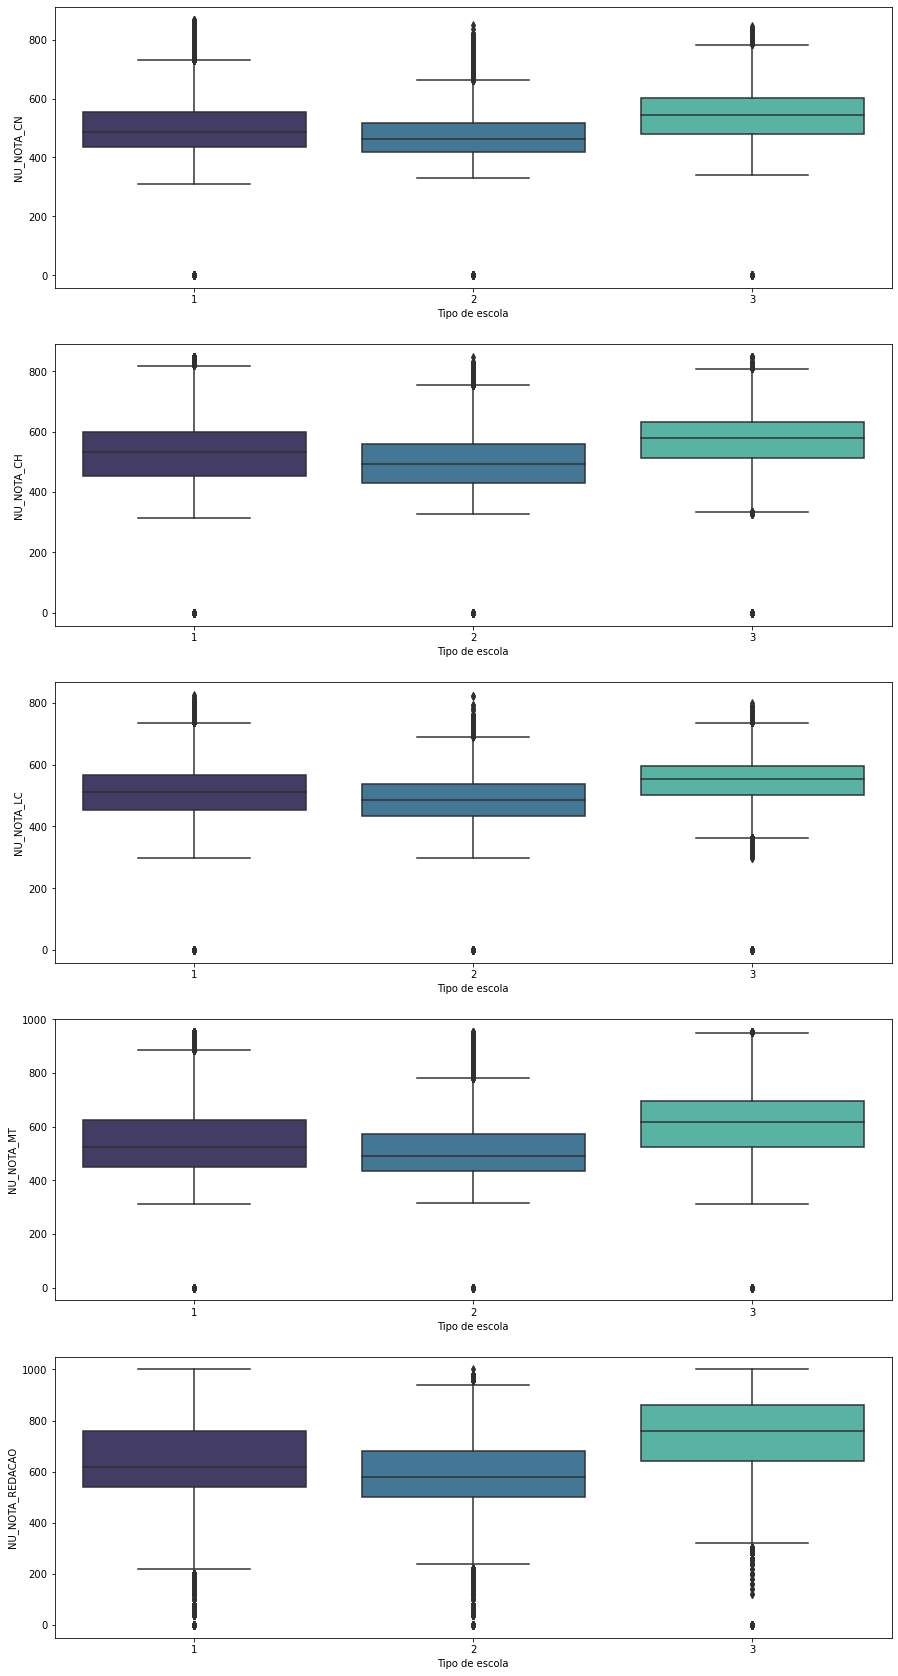

In [37]:
graficos(15, 30, 'TP_ESCOLA', "mako", 'Tipo de escola')

O desempenho dos alunos de escola Privada é sempre melhor do que os de escola Pública, porém neste caso há mais outliers do que no primeiro caso.

c) Nota e renda mensal familiar, onde:
- A - Nenhuma Renda.
- B - Até R$1100,00.
- C - R$1100,01 até R$1650,00.
- D - R$1650,01 até R$2200,00.
- E - R$2200,01 até R$2750,00.
- F - R$2750,01 até R$3300,00.
- G - R$3300,01 até R$4400,00.
- H - R$4400,01 até R$5500,00.
- I - R$5500,01 até R$6600,00.
- J - R$6600,01 até R$7700,00.
- K - R$7700,01 até R$8800,00.
- L - R$8800,01 até R$9900,00.
- M - R$9900,01 até R$11000,00.
- N - R$11000,01 até R$13200,00.
- O - R$13200,01 até R$16500,00.
- P - R$16500,01 até R$22000,00.
- Q - Acima de R$22000,00.

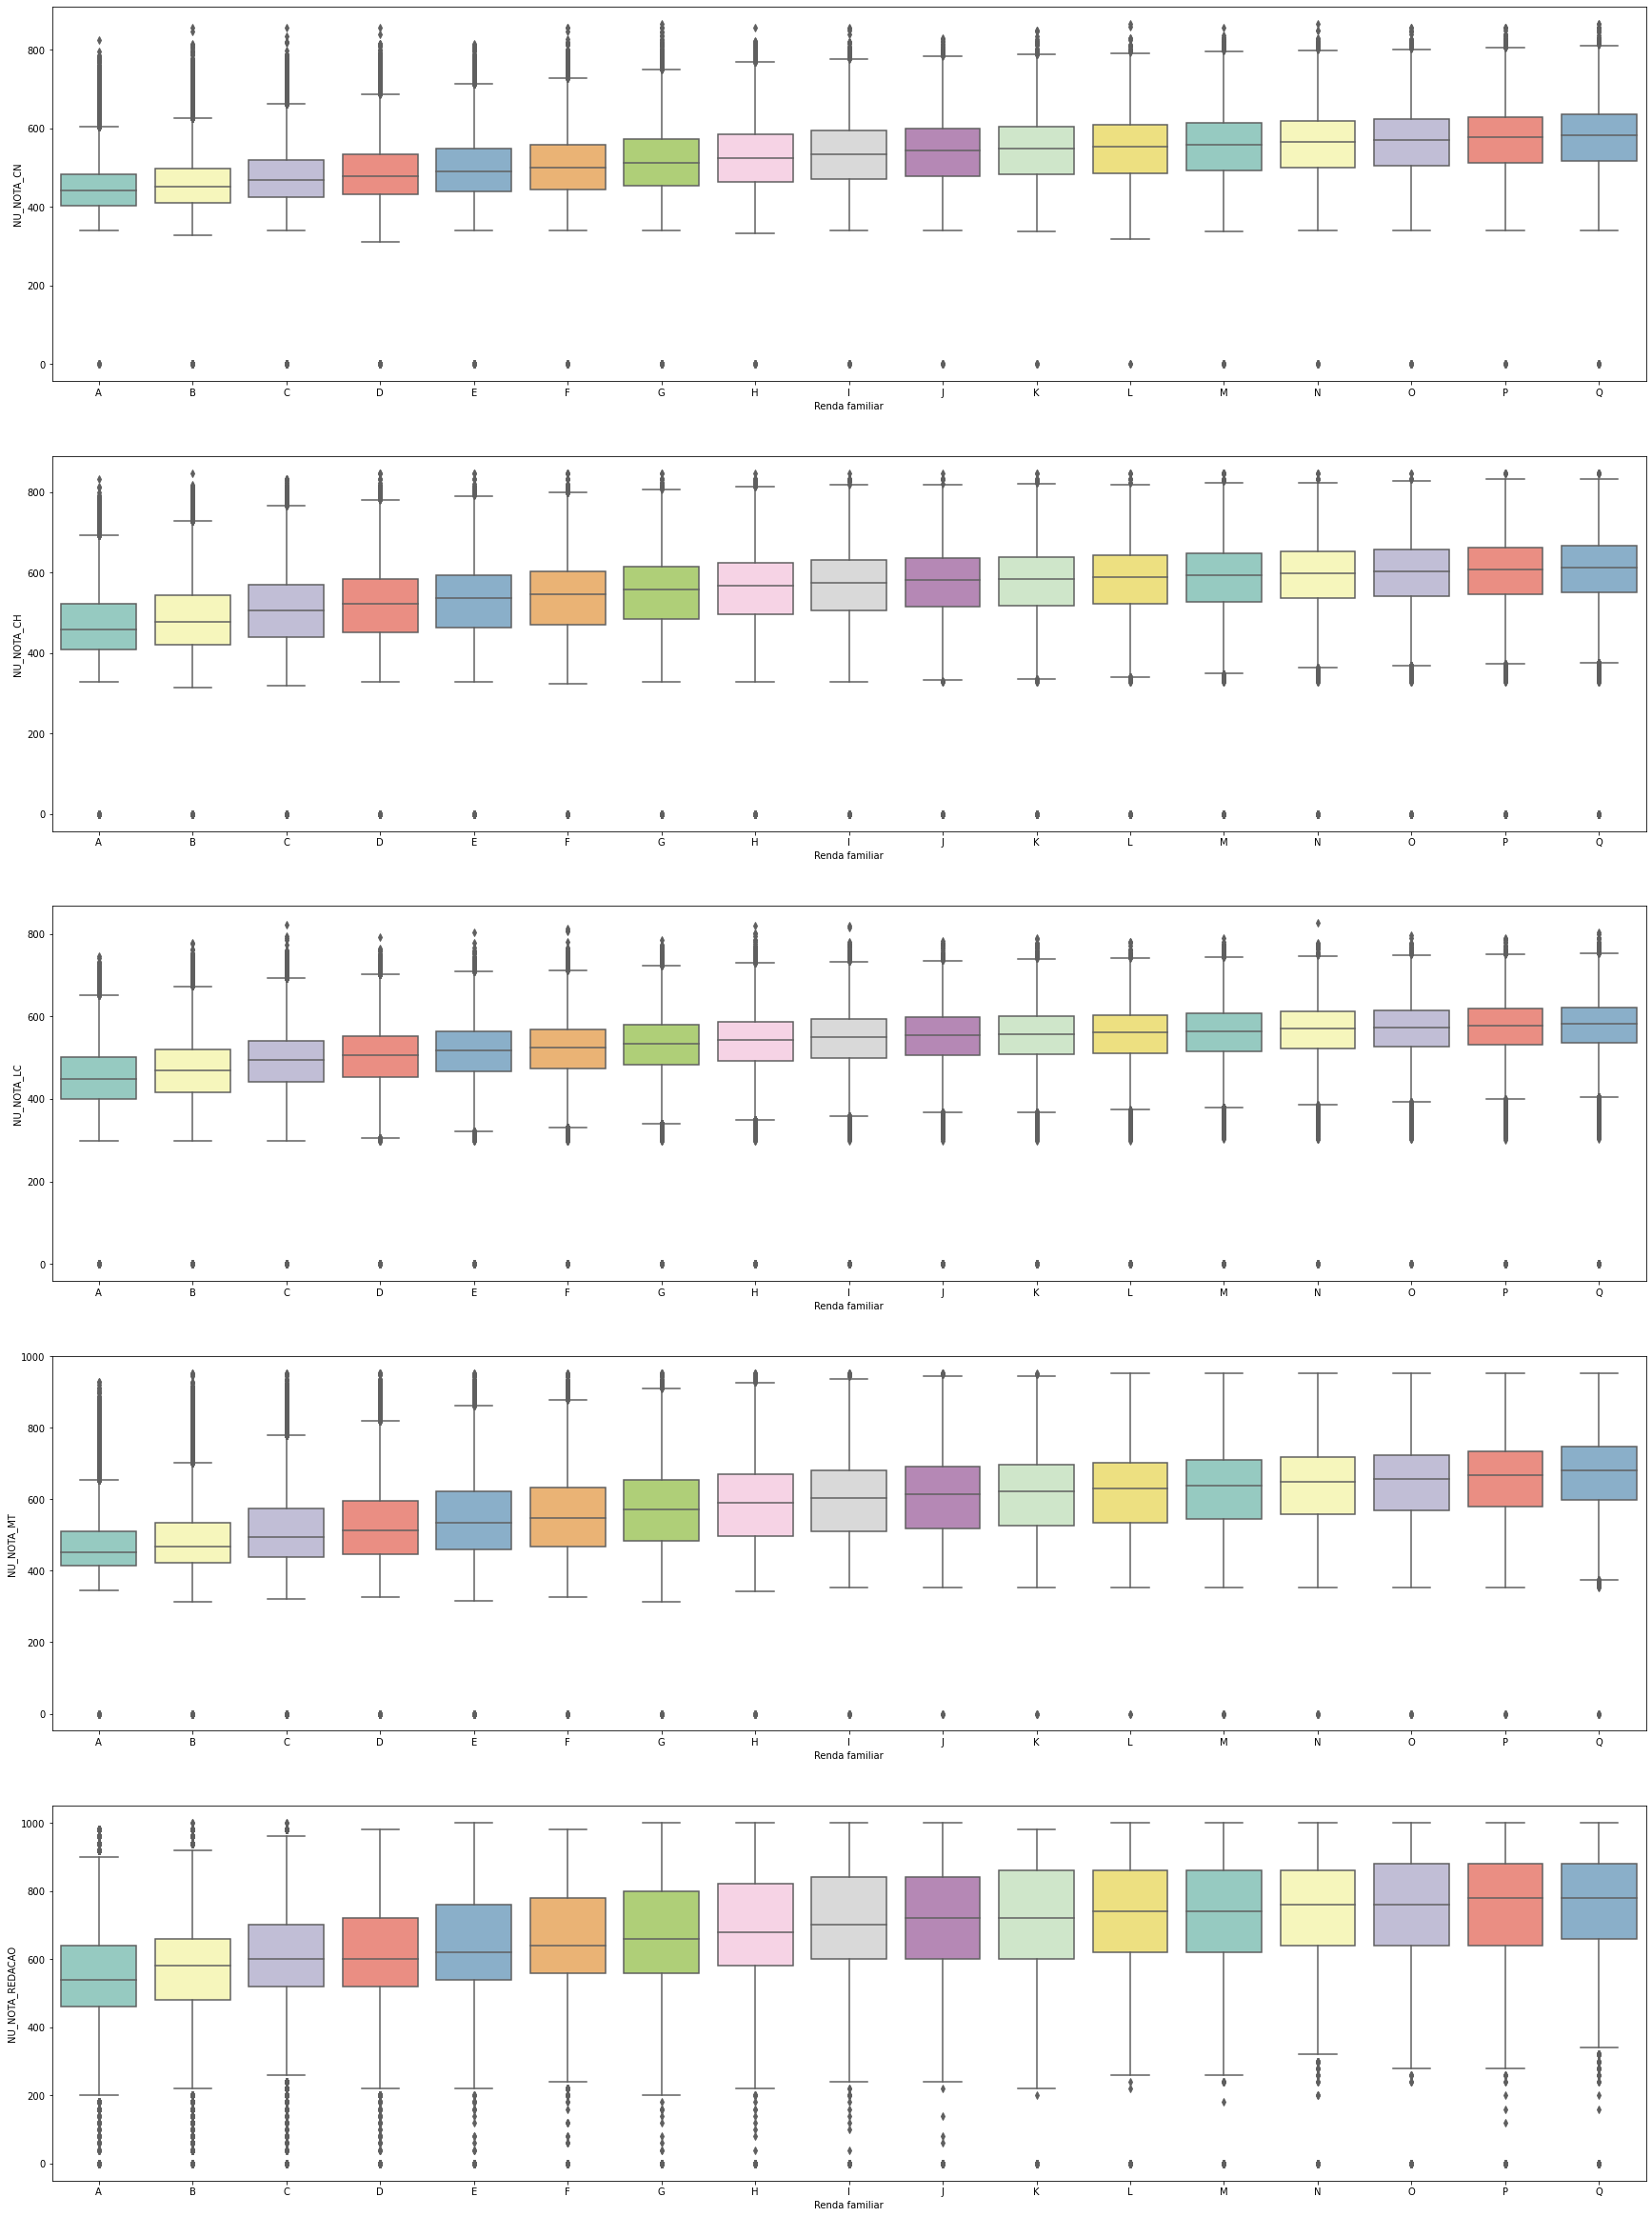

In [38]:
graficos(30, 42, 'Q006', 'Set3', 'Renda familiar')

In [26]:
df['Q006'].mode()

0    B
Name: Q006, dtype: category
Categories (17, object): ['A', 'B', 'C', 'D', ..., 'N', 'O', 'P', 'Q']

Nota-se que a renda mensal familiar tem influência positiva na nota dos alunos. Há um gradual aumento da nota juntamente com o aumento da renda familiar, com uma tendência à estagnação nas rendas mais altas. No entanto, a renda mensal mais comum pertence à classe B, sendo até R$1100 por mês.

d) Nota e escolaridade do pai ou homem responsável, onde:

- A - Nunca estudou.
- B - Completou a 4ª série/5ª ano do Ensino Fundamental.
- C - Completou a 4ª série/5ª ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E - Completou o Ensino Médio, mas não completou a Faculdade.
- F - Completou a Faculdade, mas não completou a Pós-Graduação.
- G - Completou a Pós-Graduação.
- H - Não sei.

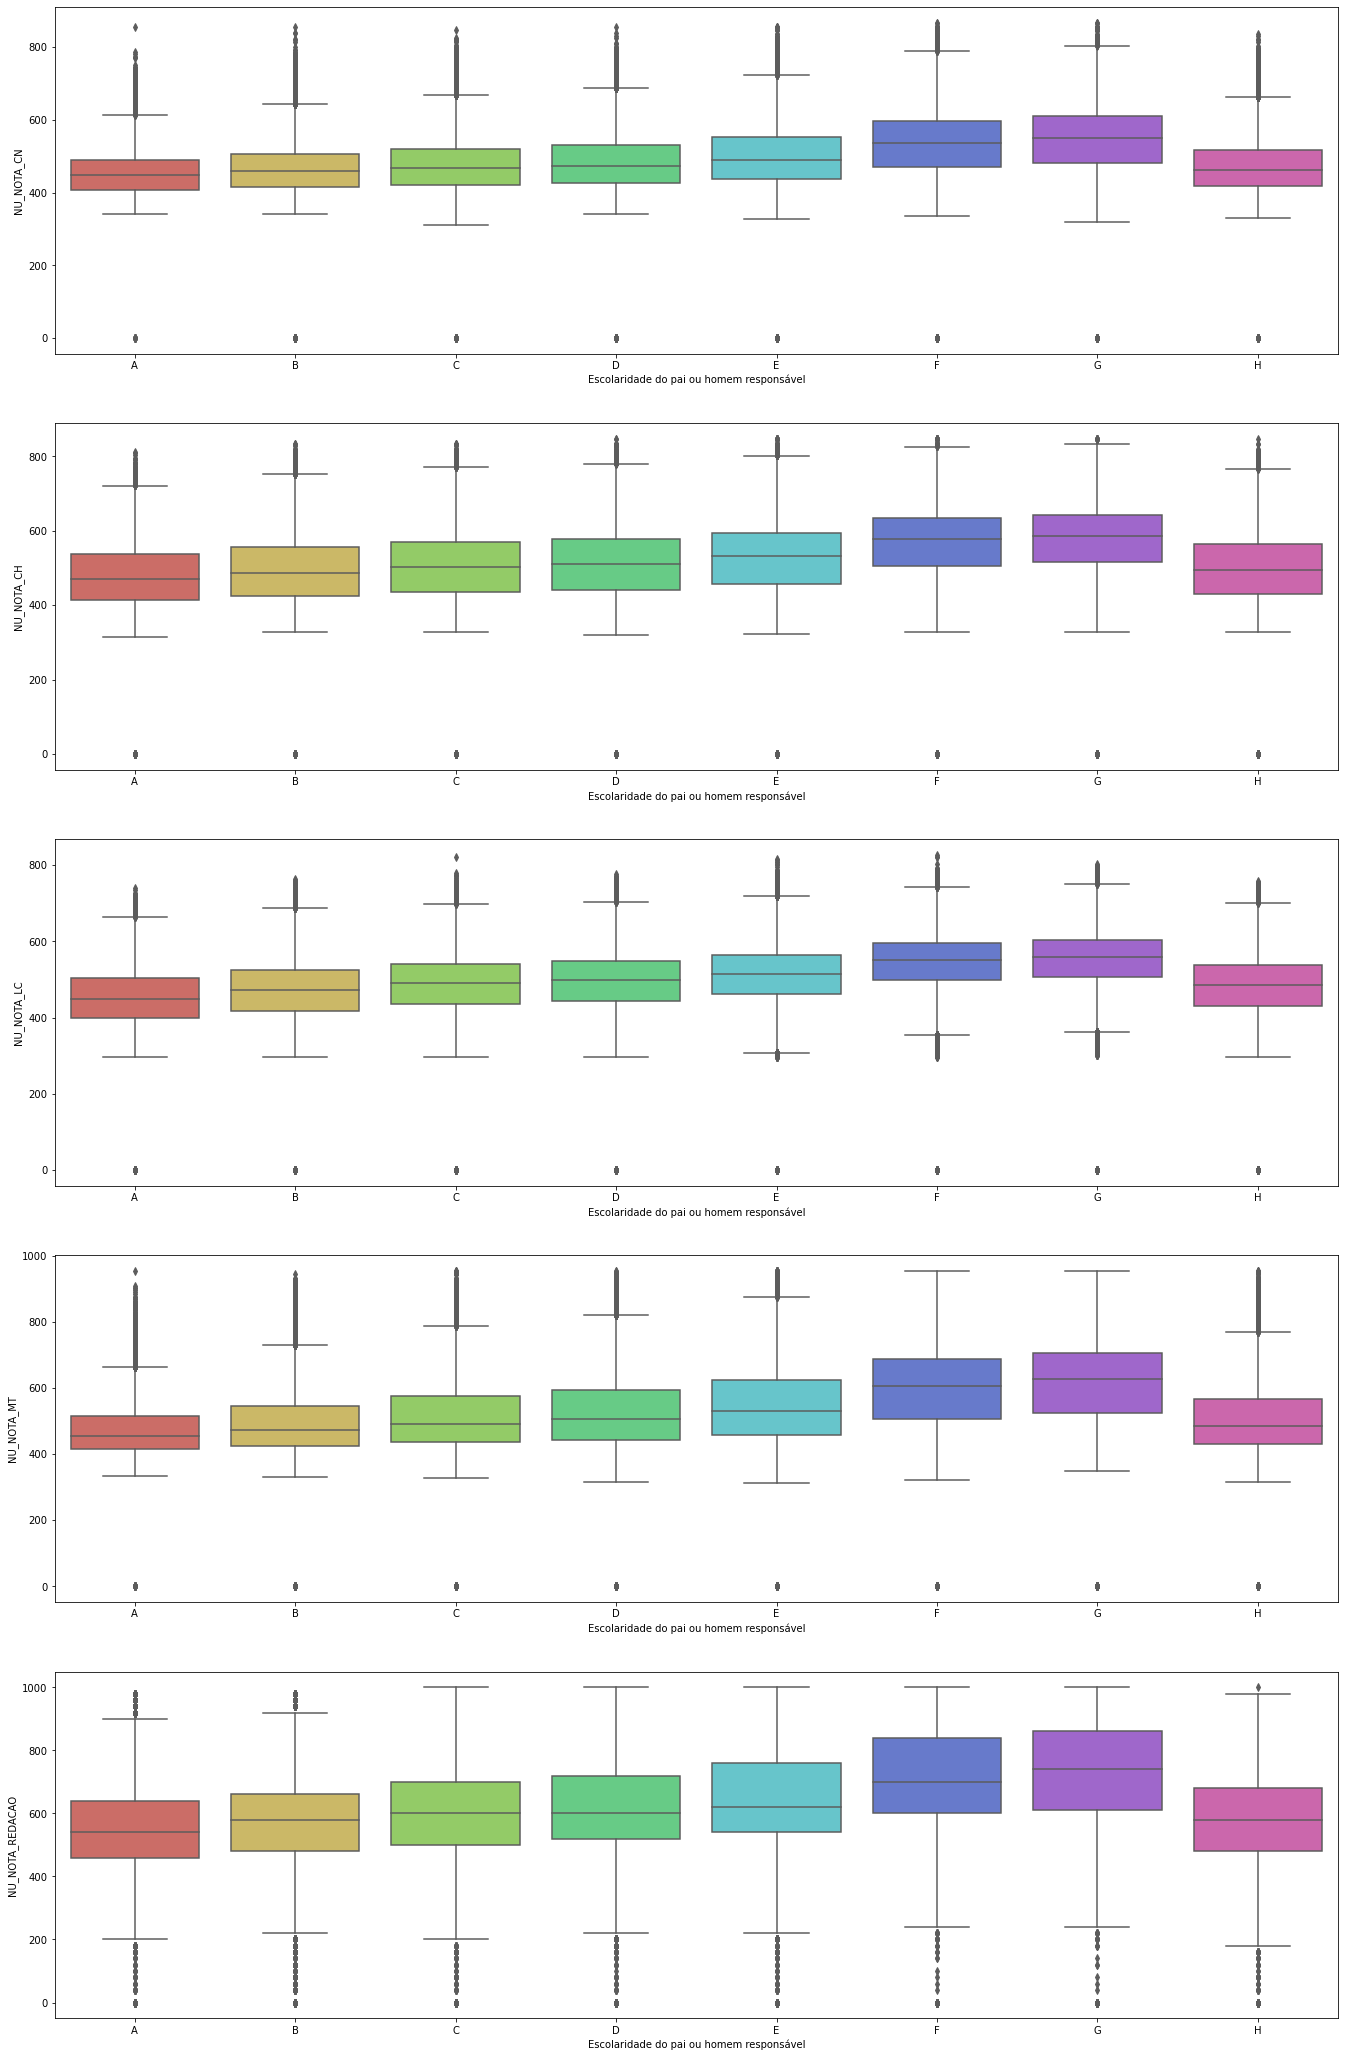

In [39]:
graficos(23, 37, 'Q001', 'hls', 'Escolaridade do pai ou homem responsável')

In [28]:
df['Q001'].mode()

0    E
Name: Q001, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

e) Nota e escolaridade da mãe ou mulher responsável, onde:

- A - Nunca estudou.
- B - Completou a 4ª série/5ª ano do Ensino Fundamental.
- C - Completou a 4ª série/5ª ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E - Completou o Ensino Médio, mas não completou a Faculdade.
- F - Completou a Faculdade, mas não completou a Pós-Graduação.
- G - Completou a Pós-Graduação.
- H - Não sei.

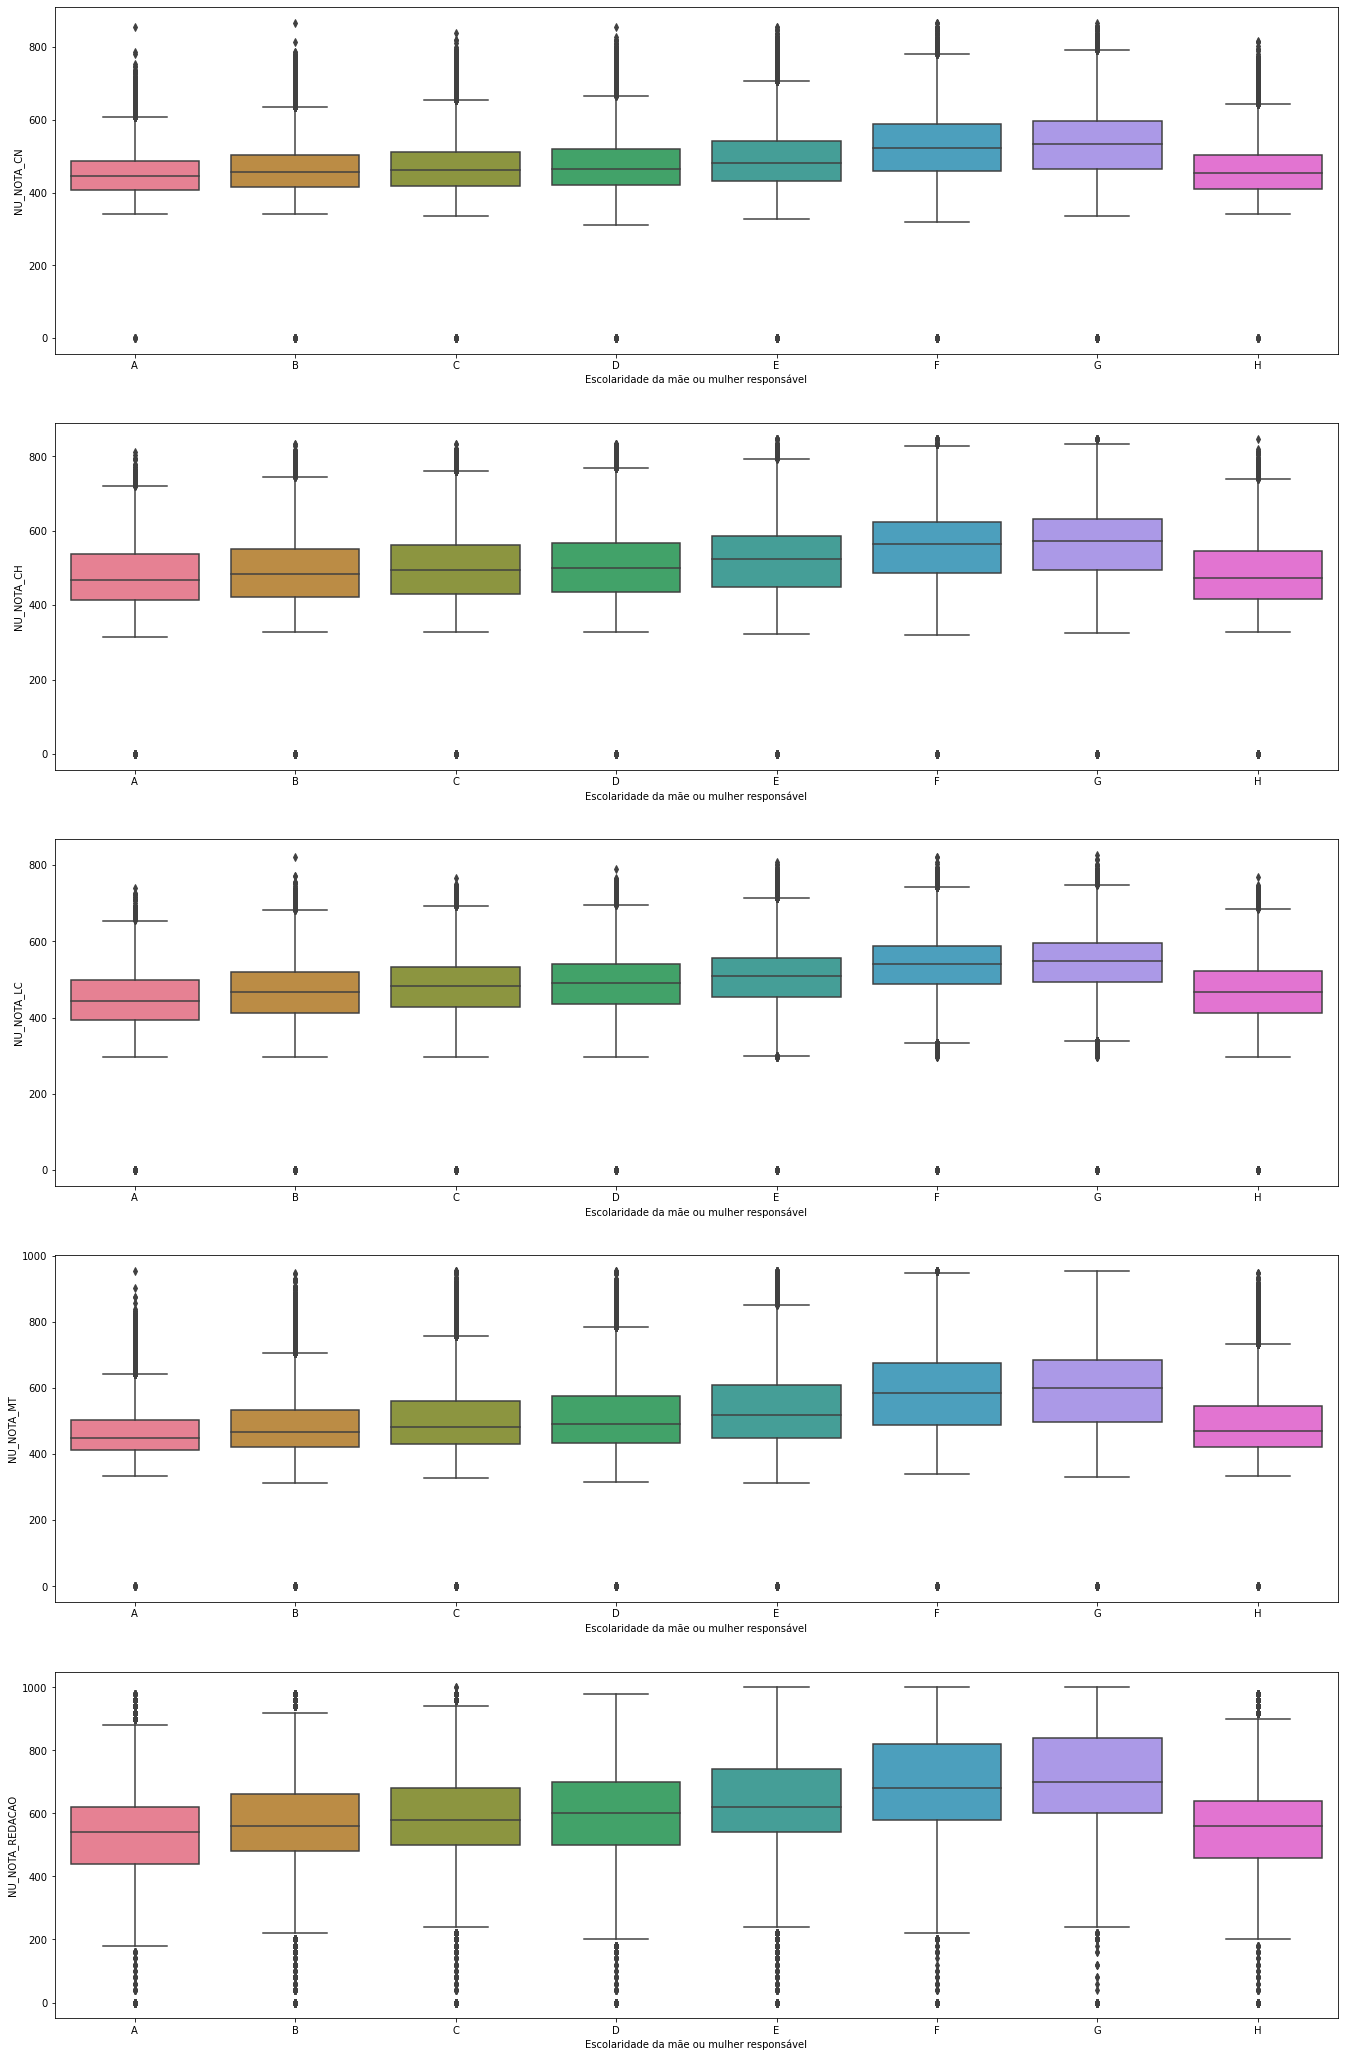

In [41]:
graficos(23, 37, 'Q002', 'husl', 'Escolaridade da mãe ou mulher responsável')

In [30]:
df['Q002'].mode()

0    E
Name: Q002, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

A escolaridade do pai e da mãe influenciam positivamente a nota, de modo que quanto maior o grau de escolaridade dos pais ou responsáveis, melhores as notas. Além disso, o grau de escolaridade mais comum dos pais ou responsáveis é o E, com Ensino Médio completo, mas sem Faculdade.

f) Nota e ocupação do pai ou homem resposável, onde:
- A - Lavrador, agricultor sem empregados, bóia fria, criador de animais, apicultor, pescador, lenhador, seringueiro, extrativista.
- B - Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro, motorista particular, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
- C - Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneio mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador de mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
- D - Professor, técnico, policial, militar de baixa patente, corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário, pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo.
- E - Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
- F - Não sei.

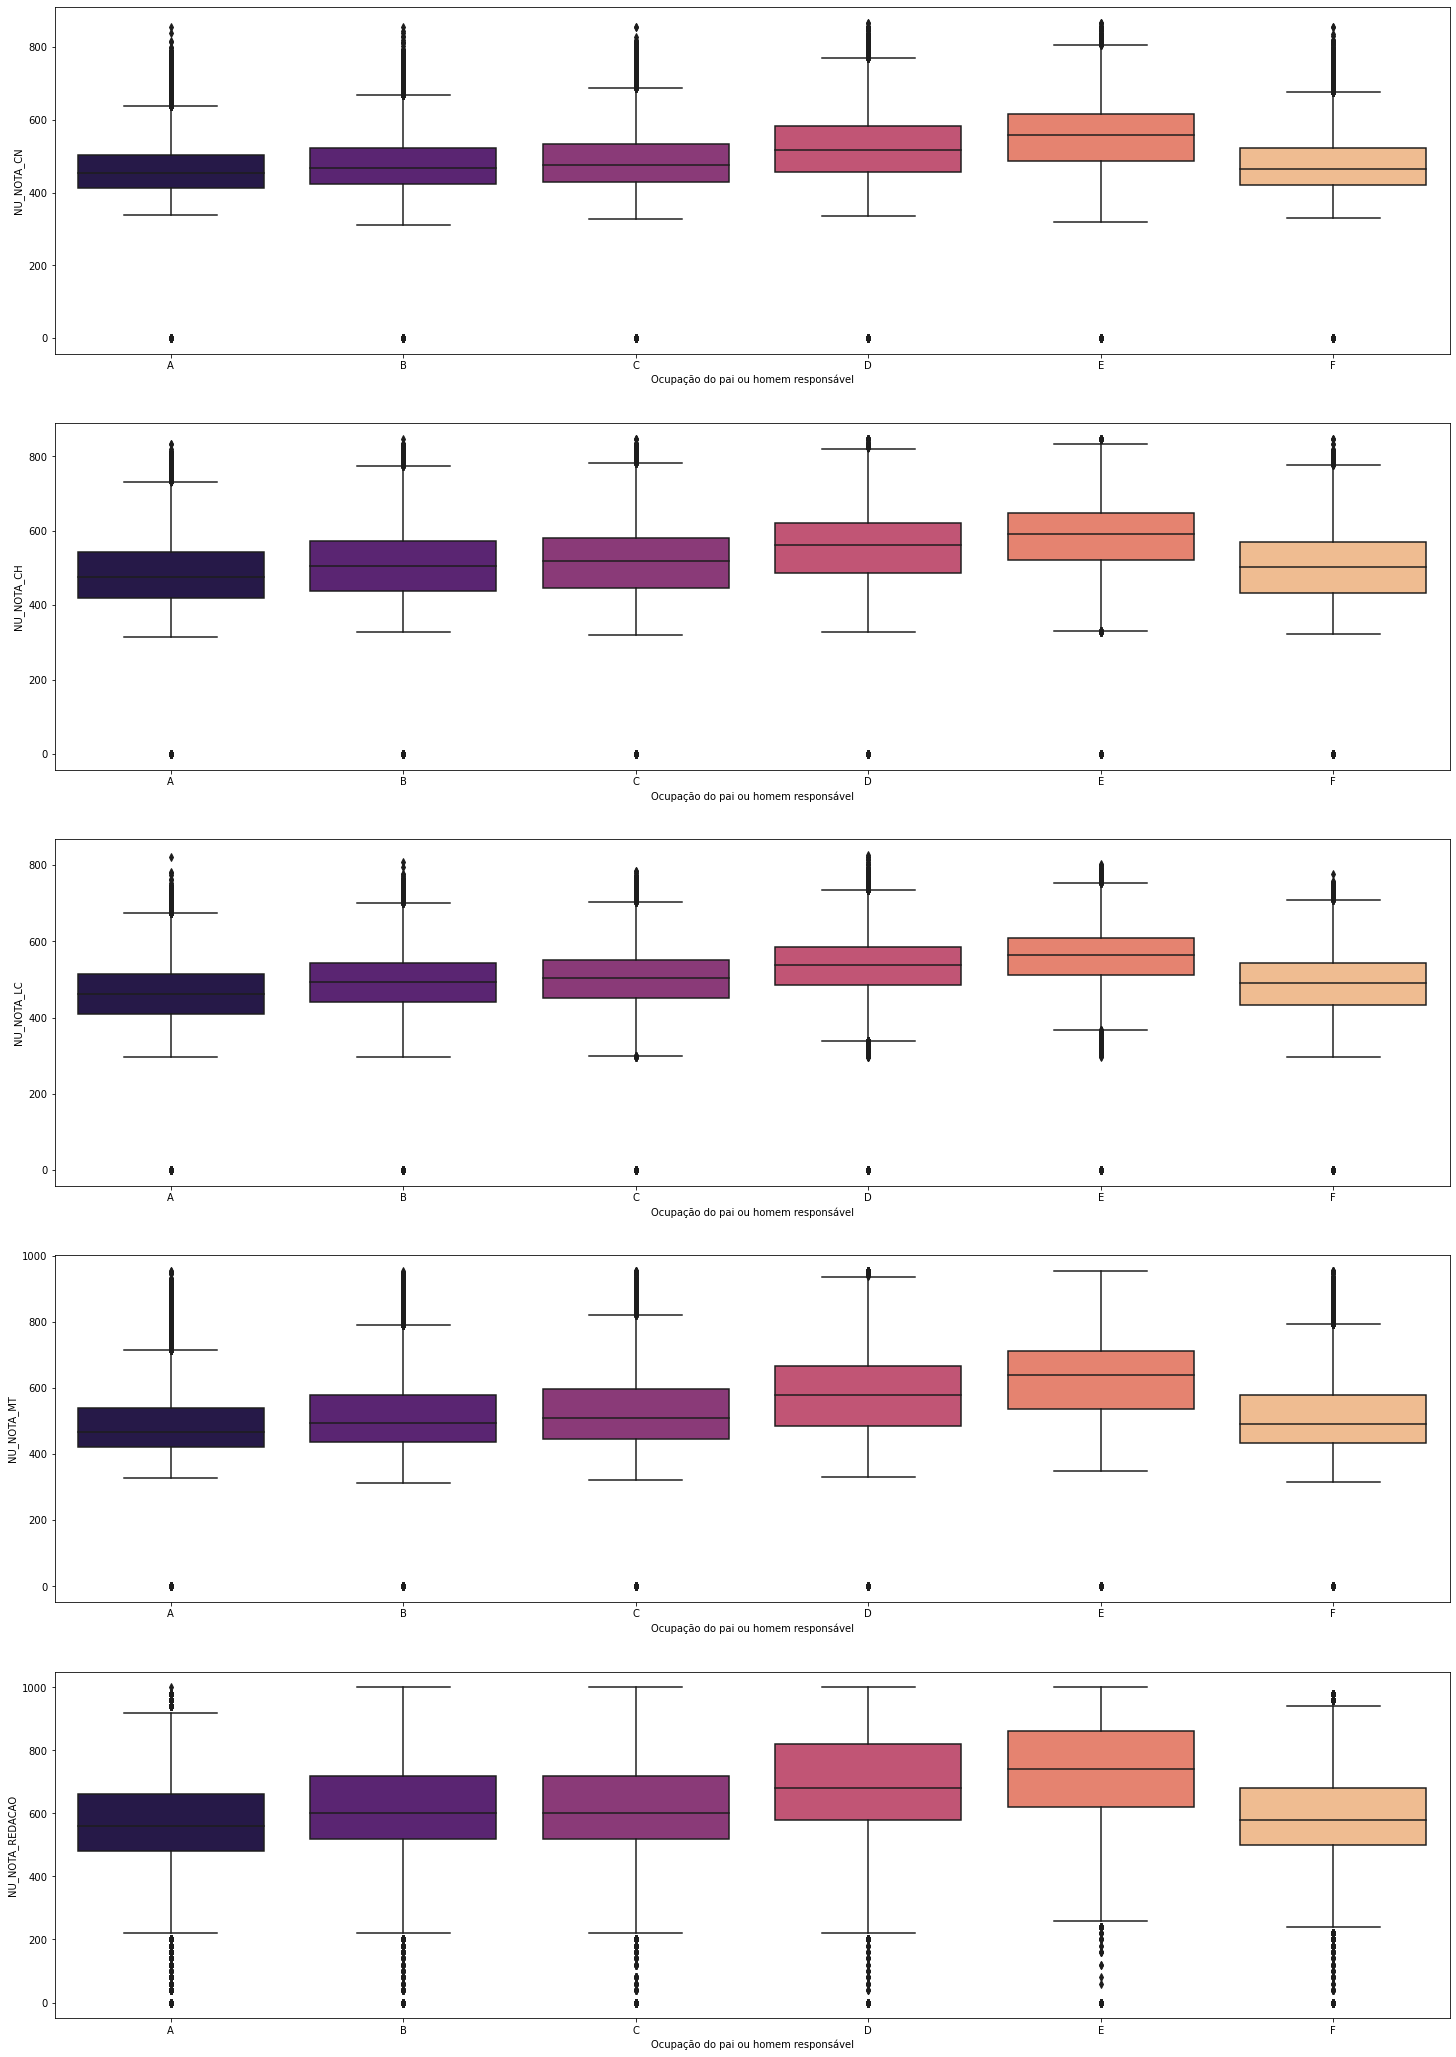

In [42]:
graficos(25, 37, 'Q003', 'magma', 'Ocupação do pai ou homem responsável')

In [32]:
df['Q003'].mode()

0    C
Name: Q003, dtype: category
Categories (6, object): ['A', 'B', 'C', 'D', 'E', 'F']

g) Nota e ocupação da mãe ou mulher resposável, onde:
- A - Lavradora, agricultora sem empregados, bóia fria, criadora de animais, apicultora, pescadora, lenhadora, seringueira, extrativista.
- B - Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira, motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
- C - Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânico, operadora de máquinas, soldadora, operária de fábrica, trabalhadora de mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
- D - Professora, técnico, policial, militar de baixa patente, corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária, pequena comerciante, pequena proprietário de terras, trabalhadora autônoma.
- E - Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitário, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
- F - Não sei.

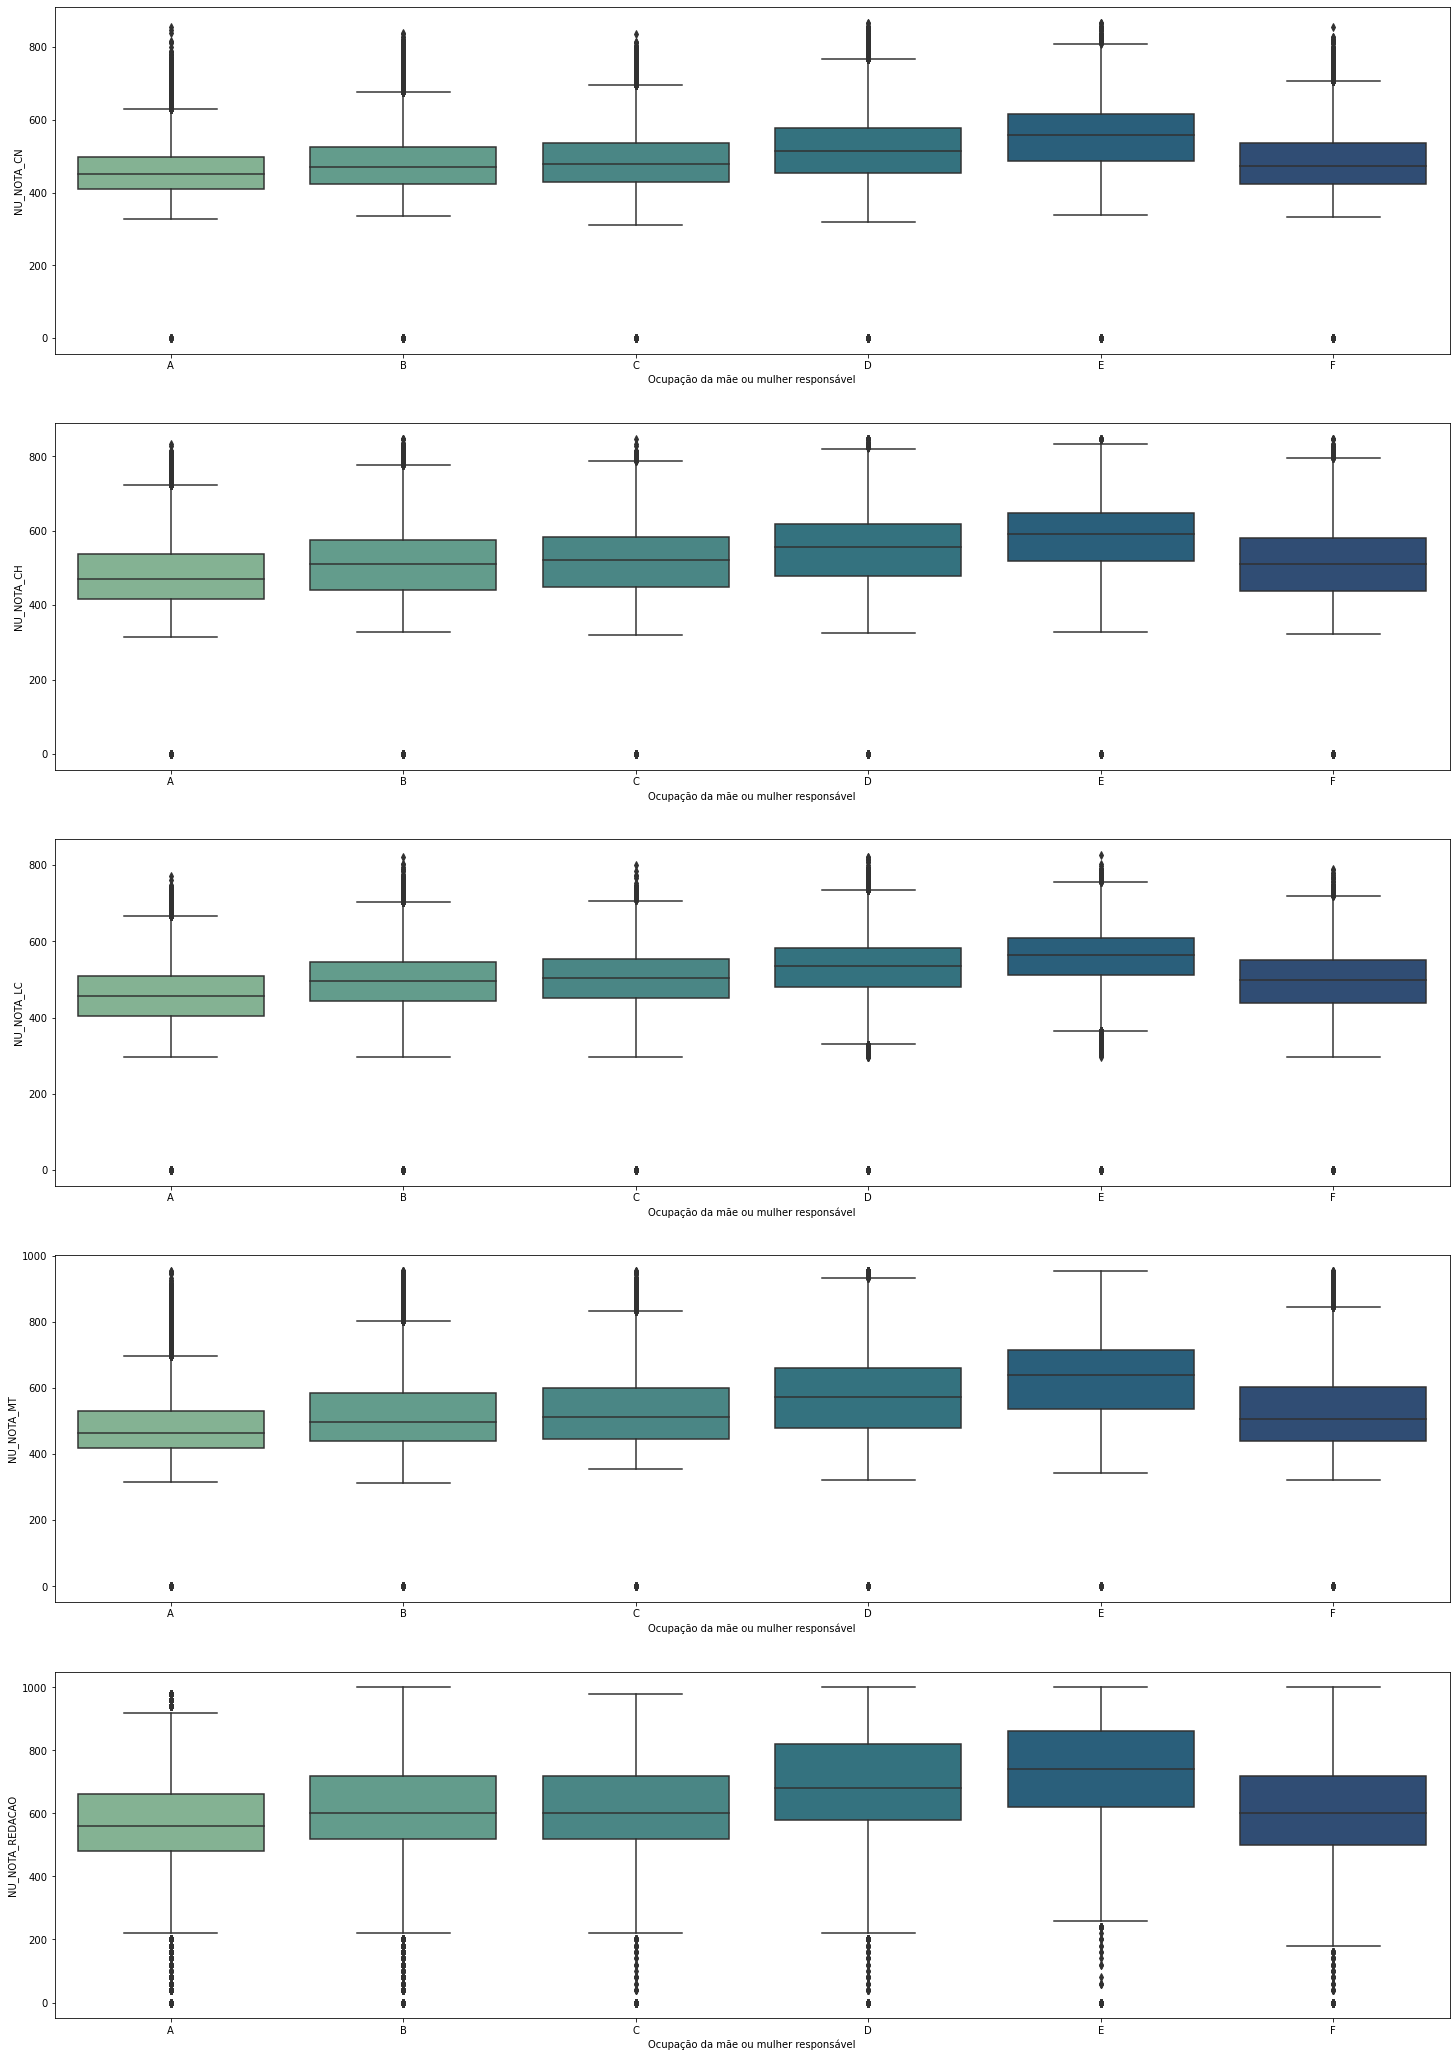

In [43]:
graficos(25, 37, 'Q004', 'crest', 'Ocupação da mãe ou mulher responsável')

In [34]:
df['Q004'].mode()

0    B
Name: Q004, dtype: category
Categories (6, object): ['A', 'B', 'C', 'D', 'E', 'F']

A ocupação dos pais ou responsáveis também influencia positivamente as notas. Nota-se, também, que a ocupação mais comum para os pais ou homens responsáveis por quem está fazendo a prova é da classe C, enquanto que para as mães ou mulheres responsáveis é da classe B. 

h) Nota e número de pessoas que moram na residência

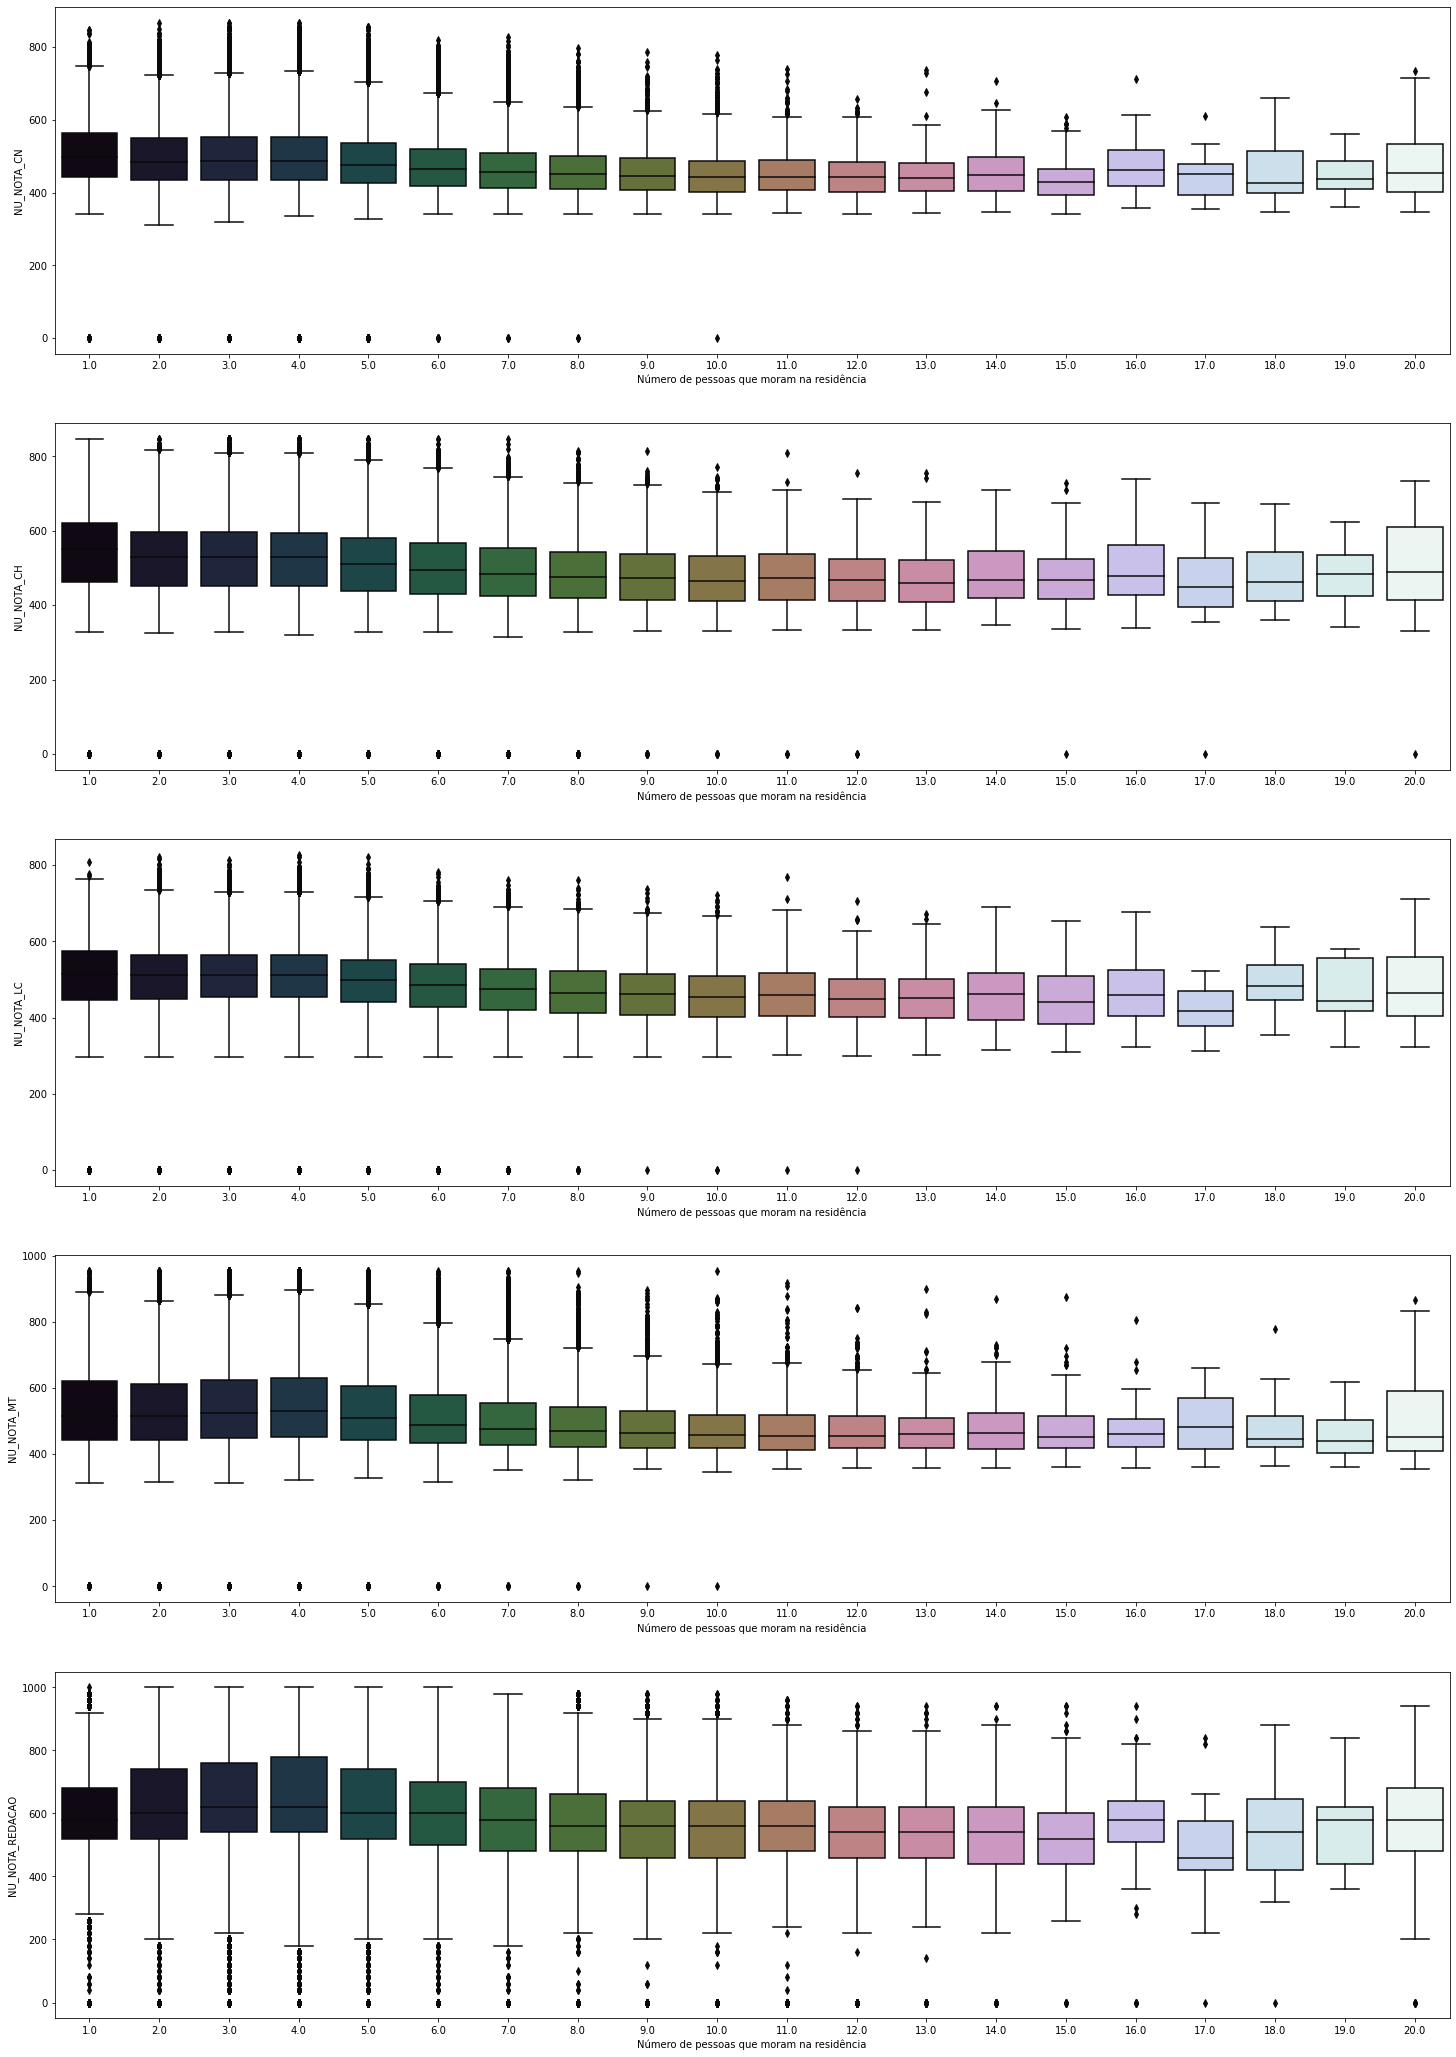

In [44]:
graficos(25, 37, 'Q005', 'cubehelix', 'Número de pessoas que moram na residência')

In [36]:
df['Q005'].value_counts()

4.0     923682
3.0     729859
5.0     408893
2.0     338523
6.0     134928
1.0      66096
7.0      47626
8.0      19835
9.0       7426
10.0      4423
11.0      1572
12.0       986
13.0       409
14.0       249
15.0       191
20.0       177
16.0        77
17.0        39
18.0        36
19.0        25
Name: Q005, dtype: int64

In [37]:
df['Q005'].mean()

3.773467329496784

O numéro médio de pessoas morando na mesma casa dos estudantes é de 3.77 pessoas. Abaixo desta média, existe uma leve tendência das notas serem maiores do que acima dela. Para um número acima de 15 pessoas na residência, as estatísticas se tornam imprecisas, pois há poucas respostas. 

i) Nota e existência de computador na residência, onde:
- A - Não.
- B - Sim, um.
- C - Sim, dois.
- D - Sim, três.
- E - Sim, quatro ou mais.

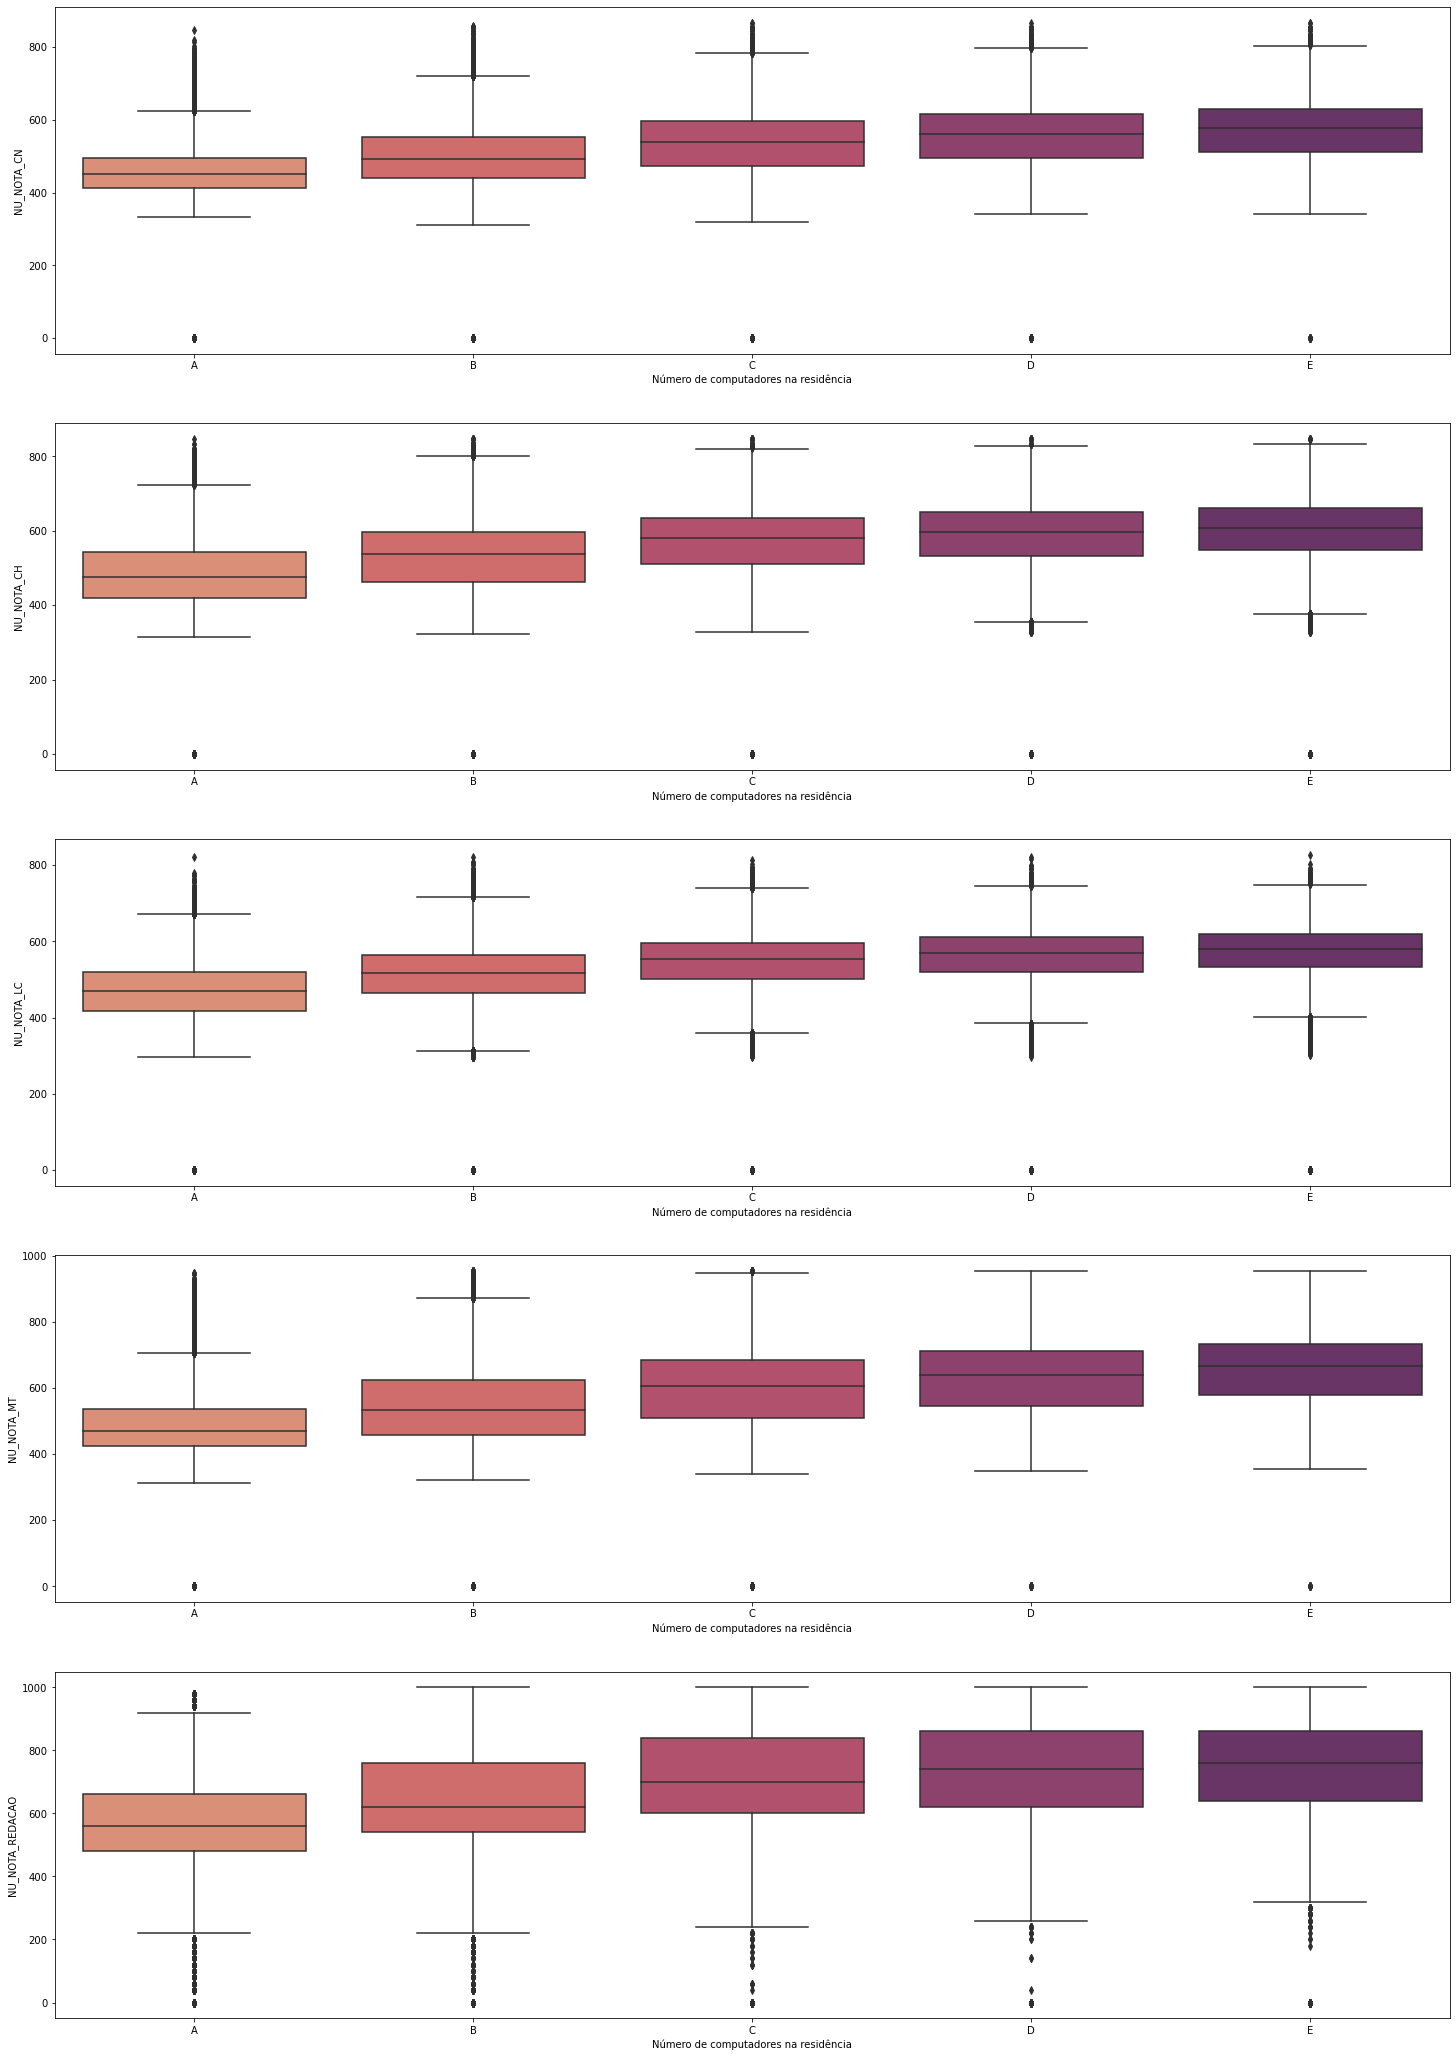

In [45]:
graficos(25, 37, 'Q024', 'flare', 'Número de computadores na residência')

É nítido o aumento das notas com o número de computadores existentes na residência.

j) Nota e acesso à Internet na residência, onde:
- A - Não.
- B - Sim.

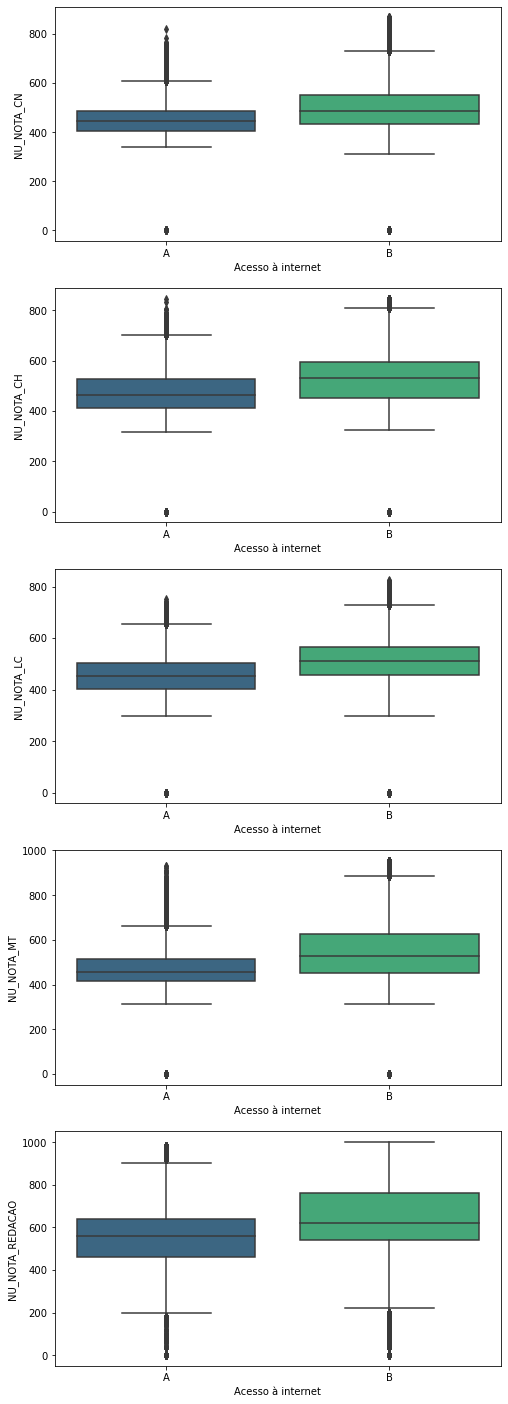

In [46]:
graficos(8, 25,'Q025', 'viridis', 'Acesso à internet')

O acesso à internet também está ligado a maiores notas.

## MICRODADOS ENEM 2018, 2019, 2020, 2021.
### 1. Nesta seção, iremos comparar as notas em cada uma das áreas para diferentes anos de realização da prova.

In [6]:
#criação das tabelas com as notas em cada área para cada um dos anos aqui utilizados
df2018 = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin1', sep=';', usecols=notas_selecionadas).assign(Location=2018)
df2018.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Location
0,534.2,611.4,517.9,496.3,360.0,2018
1,506.9,477.8,495.3,440.6,420.0,2018
2,470.6,473.8,534.4,410.4,600.0,2018
3,588.9,663.3,614.5,711.5,800.0,2018
4,477.8,621.5,519.4,543.1,500.0,2018


In [7]:
df2019 = pd.read_csv('MICRODADOS_ENEM_2019.csv', encoding='latin1', sep=';', usecols=notas_selecionadas).assign(Location=2019)
df2019.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Location
0,NaN,NaN,NaN,NaN,NaN,2019
1,NaN,NaN,NaN,NaN,NaN,2019
2,NaN,NaN,NaN,NaN,NaN,2019
3,483.8,503.6,537.3,392.0,460.0,2019
4,513.6,575.5,570.7,677.0,860.0,2019


In [8]:
df2020 = pd.read_csv('MICRODADOS_ENEM_2020.csv', encoding='latin1', sep=';', usecols=notas_selecionadas).assign(Location=2020)
df2020.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Location
0,NaN,NaN,NaN,NaN,NaN,2020
1,604.1,661.7,595.3,711.3,580.0,2020
2,NaN,NaN,NaN,NaN,NaN,2020
3,620.8,675.0,624.2,759.4,760.0,2020
4,NaN,NaN,NaN,NaN,NaN,2020


In [9]:
df2021 = pd.read_csv('MICRODADOS_ENEM_2021.csv', encoding='latin1', sep=';', usecols=notas_selecionadas).assign(Location=2021)
df2021.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Location
0,NaN,574.6,472.6,NaN,760.0,2021
1,505.9,551.8,498.3,461.5,560.0,2021
2,NaN,NaN,NaN,NaN,NaN,2021
3,580.7,678.9,638.9,659.5,780.0,2021
4,497.7,532.4,457.6,582.6,780.0,2021


In [10]:
df_final = pd.concat([df2018, df2019, df2020, df2021])
df_final.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Location
0,534.2,611.4,517.9,496.3,360.0,2018
1,506.9,477.8,495.3,440.6,420.0,2018
2,470.6,473.8,534.4,410.4,600.0,2018
3,588.9,663.3,614.5,711.5,800.0,2018
4,477.8,621.5,519.4,543.1,500.0,2018


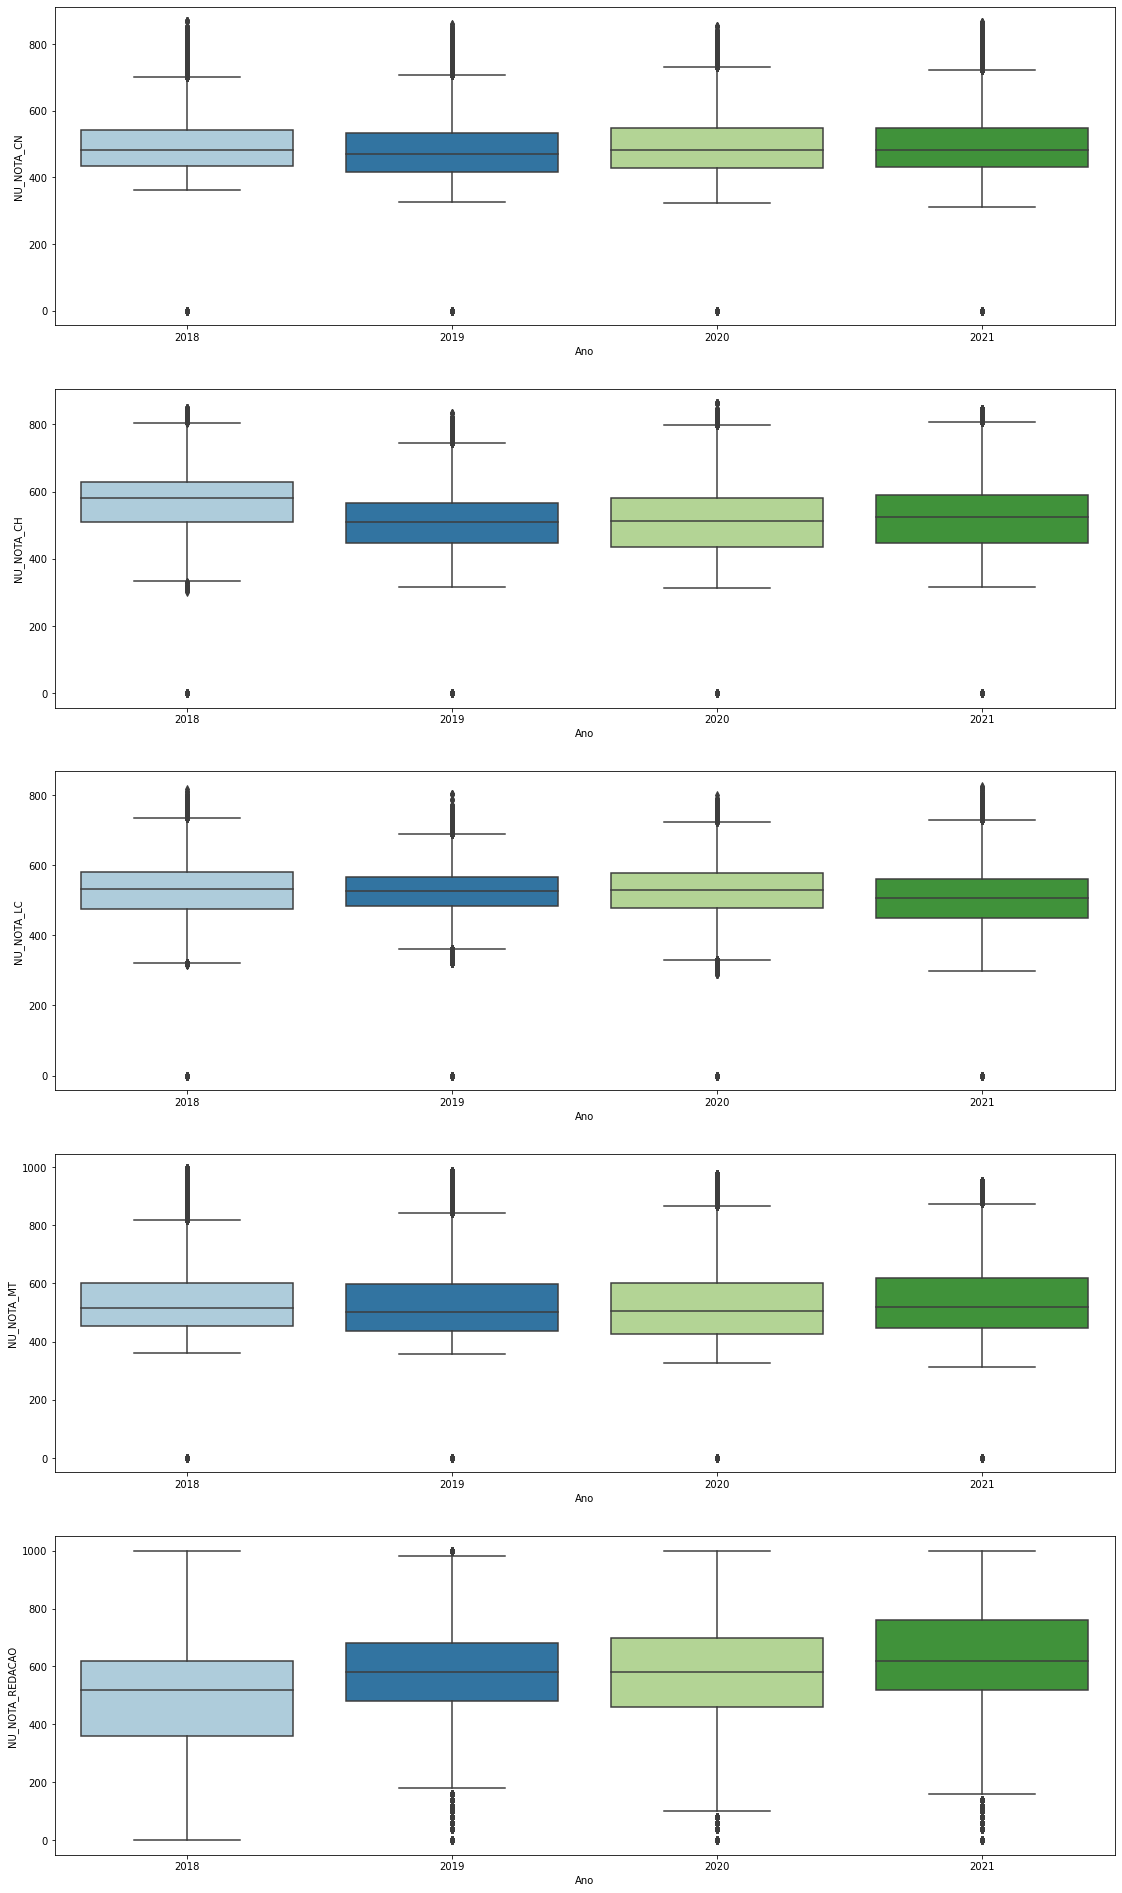

In [22]:
#gráfico das notas em função dos anos de realização da prova
fig, ax = plt.subplots(5, 1, figsize=(19, 34))

for i in range(5):
    coluna = notas_selecionadas[i]
    sns.boxplot(data = df_final, x = 'Location', y=coluna, ax=ax[i], palette= 'Paired').set_xlabel('Ano')

Nota-se que não existem grandes diferenças entre as notas nas provas ao longo dos anos. Em redação, no entando, houve um visível aumento da média do longo dos anos, sendo a maior em 2021.

### 2. Nesta seção, iremos comparar a quantidade de alunos de diferentes sexos nos diferentes anos.

In [1]:
col_selecionada =['TP_SEXO']

In [5]:
#criação das tabelas com sexo e escola para cada um dos anos aqui utilizados
df18 = pd.read_csv('MICRODADOS_ENEM_2018.csv', encoding='latin1', sep=';', usecols=col_selecionada).assign(Ano=2018)
df18.head()

,TP_SEXO,Ano
0,F,2018
1,F,2018
2,M,2018
3,F,2018
4,F,2018


In [6]:
df19 = pd.read_csv('MICRODADOS_ENEM_2019.csv', encoding='latin1', sep=';', usecols=col_selecionada).assign(Ano=2019)
df19.head()

,TP_SEXO,Ano
0,M,2019
1,M,2019
2,F,2019
3,F,2019
4,F,2019


In [7]:
df20 = pd.read_csv('MICRODADOS_ENEM_2020.csv', encoding='latin1', sep=';', usecols=col_selecionada).assign(Ano=2020)
df20.head()

,TP_SEXO,Ano
0,F,2020
1,M,2020
2,F,2020
3,M,2020
4,F,2020


In [8]:
df21 = pd.read_csv('MICRODADOS_ENEM_2021.csv', encoding='latin1', sep=';', usecols=col_selecionada).assign(Ano=2021)
df21.head()

,TP_SEXO,Ano
0,F,2021
1,M,2021
2,F,2021
3,M,2021
4,F,2021


In [9]:
#concatenando as tabelas geradas para cada um dos anos
df_final2 = pd.concat([df18, df19, df20, df21])
df_final2.head()

,TP_SEXO,Ano
0,F,2018
1,F,2018
2,M,2018
3,F,2018
4,F,2018


In [10]:
df_final2.shape

(19077066, 2)

In [11]:
df_final2.memory_usage(index=False, deep=True)

TP_SEXO    1106469828
Ano         152616528
dtype: int64

In [12]:
df_final2.dtypes

TP_SEXO    object
Ano         int64
dtype: object

In [13]:
#alterando os tipos de cada coluna para economizar memória
df_final2['Ano'] = df_final2['Ano'].astype('int16')
df_final2['TP_SEXO'] = df_final2['TP_SEXO'].astype('category')

In [14]:
df_final2.dtypes

TP_SEXO    category
Ano           int16
dtype: object

In [15]:
df_final2.memory_usage(index=False, deep=True)

TP_SEXO    19077290
Ano        38154132
dtype: int64

Análise de acordo com o sexo para os diferentes anos:

<AxesSubplot:xlabel='Ano', ylabel='count'>

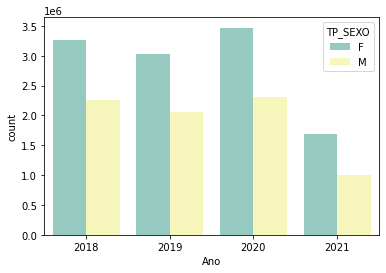

In [16]:
sns.countplot(data=df_final2, x='Ano', hue='TP_SEXO', palette='Set3')

Pode-se notar que a quantidade de mulheres fazendo a prova é sempre maior que a de homens, com pequenas variações no número total de candidatos ao longo dos anos, exceto em 2021, em que esse número caiu pela metade, aproximadamente, o que pode ser efeito da pandemia.